## There are multiple objectives of this task: 1. Data Clustering and 2. Dimensionality Reduction

## We will be reading the data from tripadvisor_review.csv file which consists of user's average rating on 10 categories of attractions.

In [1]:
# Importing all the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported!!!")
%matplotlib inline

Libraries imported!!!


In [2]:
# Loading the csv data into a data frame object using read_csv function. 
# The csv data file is in the same directory where this python program file is saved.
data = pd.read_csv("tripadvisor_review.csv")
data.shape

(980, 11)

In [3]:
data.describe().T

count      mean       std   min   25%   50%     75%   max
Category 1   980.0  0.893194  0.326912  0.34  0.67  0.83  1.0200  3.22
Category 2   980.0  1.352612  0.478280  0.00  1.08  1.28  1.5600  3.64
Category 3   980.0  1.013306  0.788607  0.13  0.27  0.82  1.5725  3.62
Category 4   980.0  0.532500  0.279731  0.15  0.41  0.50  0.5800  3.44
Category 5   980.0  0.939735  0.437430  0.06  0.64  0.90  1.2000  3.30
Category 6   980.0  1.842898  0.539538  0.14  1.46  1.80  2.2000  3.76
Category 7   980.0  3.180939  0.007824  3.16  3.18  3.18  3.1800  3.21
Category 8   980.0  2.835061  0.137505  2.42  2.74  2.82  2.9100  3.39
Category 9   980.0  1.569439  0.364629  0.74  1.31  1.54  1.7600  3.17
Category 10  980.0  2.799224  0.321380  2.14  2.54  2.78  3.0400  3.66

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [5]:
# corr = data.corr()
# corr.style.background_gradient(cmap='coolwarm')

# Evaluating data texture (data type, null count & unique values) of dataset.

In [6]:
index = list(data.columns)
new_df = pd.DataFrame(index=index)
for ix in data.columns:
    new_df.at[ix,'data_types'] = data[ix].dtypes
    new_df.at[ix,'null_counts'] = data[ix].isnull().sum()
    new_df.at[ix,'unique_values'] = data[ix].nunique()
new_df

data_types  null_counts  unique_values
User ID         object          0.0          980.0
Category 1     float64          0.0           84.0
Category 2     float64          0.0           73.0
Category 3     float64          0.0          195.0
Category 4     float64          0.0           91.0
Category 5     float64          0.0           87.0
Category 6     float64          0.0          135.0
Category 7     float64          0.0            6.0
Category 8     float64          0.0           68.0
Category 9     float64          0.0           65.0
Category 10    float64          0.0           56.0

In [7]:
# We need to drop the User ID column as it is not a numerical column
X = data.drop(['User ID'],axis=1)
cols = X.columns
print(cols)

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10'],
      dtype='object')


# We will create a boxplot to see outliers in each category and overall rating distribution

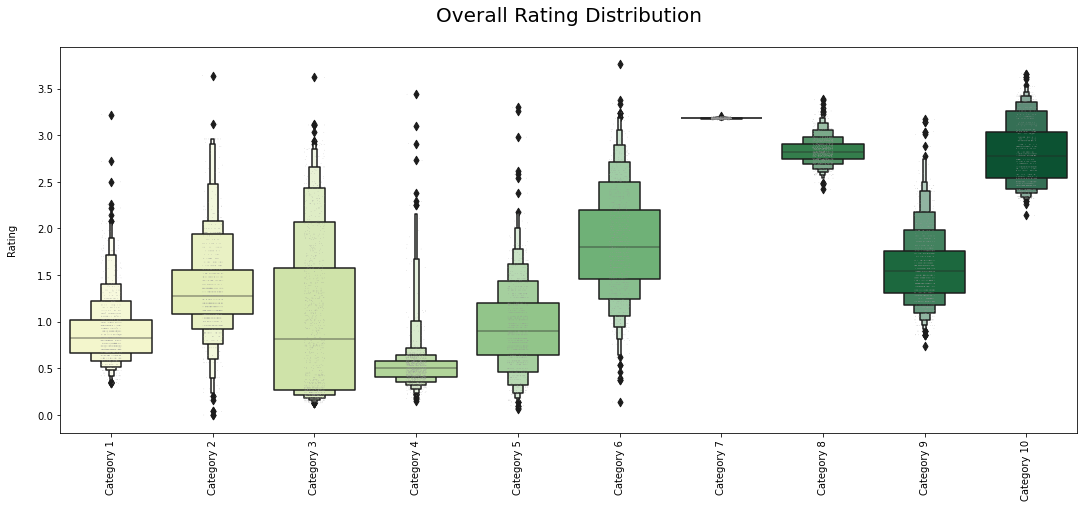

In [8]:
# boxplot = plt.subplots(figsize=(20, 8))
# boxplot = sns.boxplot(data= X, palette="YlGn")
# sns.despine()
# boxplot.set_xlabel('Category', fontsize = 20)
# boxplot.set_ylabel('Rating', fontsize = 20)
# boxplot.set_title('Category Box-Plot', fontsize = 25)
# plt.tight_layout(pad = 0.5)
# plt.xticks(rotation= 35)
# plt.show()

df_transform = pd.melt(X,value_vars=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10'])

fig = plt.figure(figsize = (15,7))
g = sns.boxenplot(x='variable',y='value',data=df_transform,palette = "YlGn")
g = sns.stripplot(x='variable',y='value',data=df_transform,size=0.5, color=".6")
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title(f'Overall Rating Distribution',y=1.05,fontsize=20)
g.set_xlabel("")
g.set_ylabel("Rating",labelpad = 20)
fig.tight_layout(pad = 0.5)

### There are outliers looking at the above box plot, namely in Category 1, 2, 4, 5, 6, and 9
### Category 2, Category 3, Category 6, and Category 9 has good distribution of data.
### Overall ratings lie between 0 and 3.76.
### Category 1, Category 4 and Category 5 have low ratings.
### Category 7, Category 8, and Category 10 have a very high ratings.
### So it would be a good idea to scale our data later.

# Category wise distribution of ratings using histogram

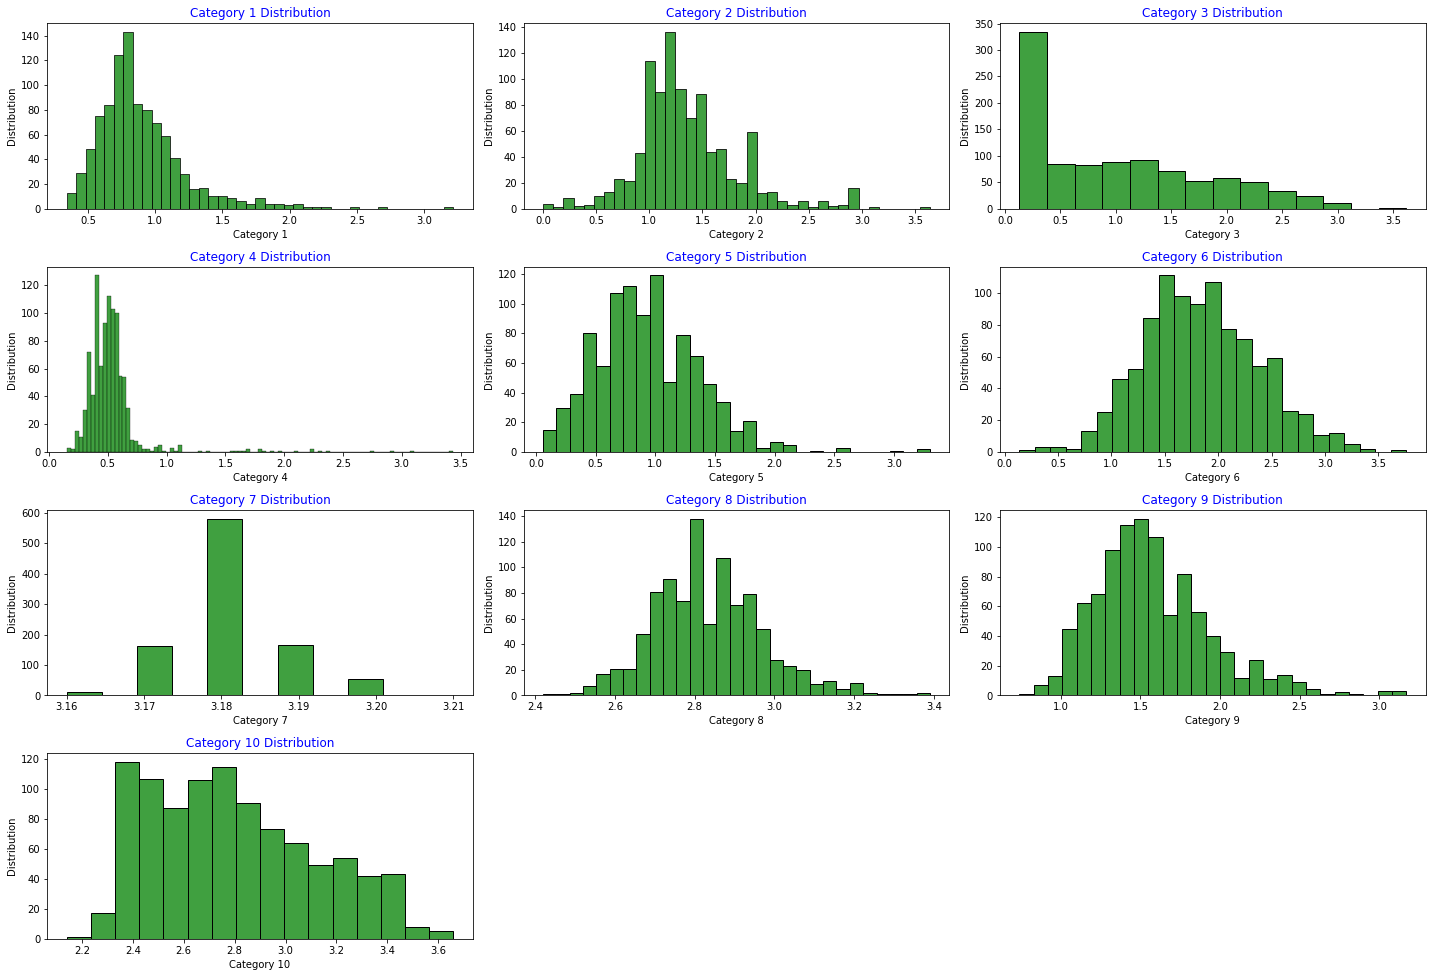

In [9]:
f=plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    ax=f.add_subplot(6,3,i+1)
    sns.histplot(data[col].ffill(),kde=False,color = 'Green')
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

# Let's build a correlation matrix

<AxesSubplot:>

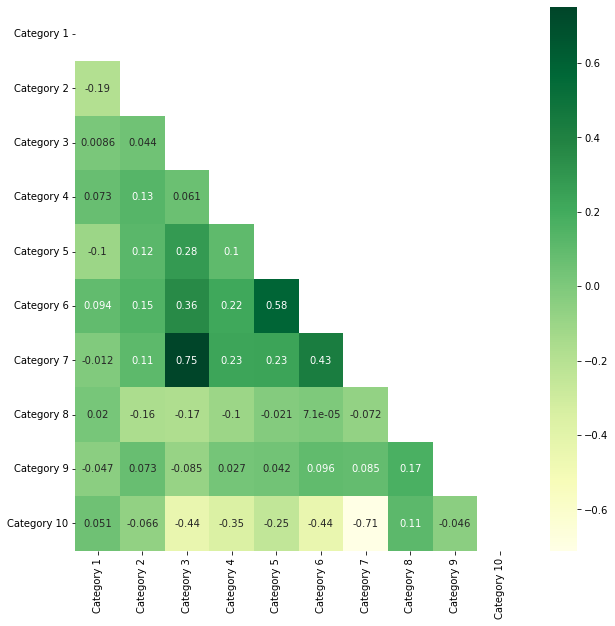

In [10]:
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='YlGn',annot=True)

# Creating a cluster map

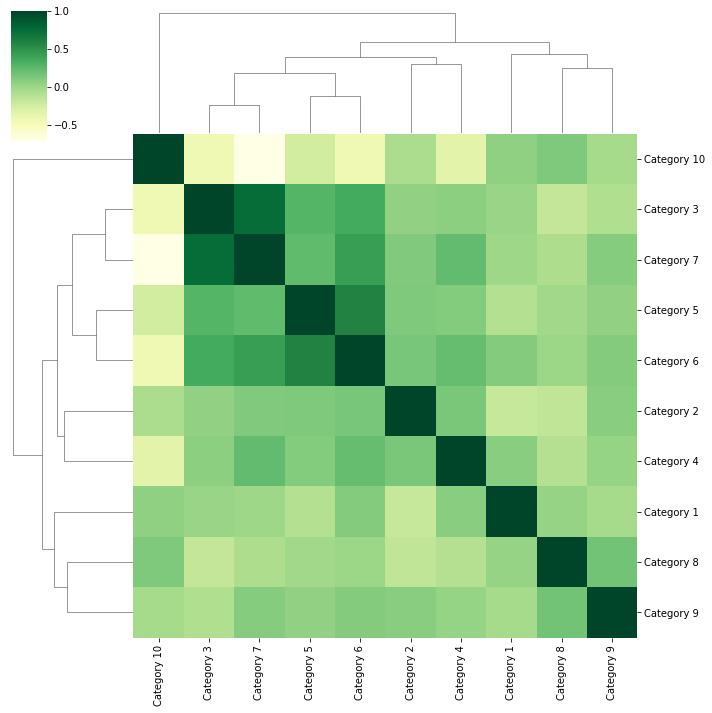

In [11]:
clustermap = sns.clustermap(X.corr(), cmap = 'YlGn')

plt.show()

# Lets check the skewness of the each attribute

In [12]:
Skew_DF = X.skew()
Skew_DF.sort_values(ascending = False) 

Category 4     5.263044
Category 1     1.724505
Category 9     0.967938
Category 2     0.937885
Category 5     0.832060
Category 3     0.710687
Category 8     0.467575
Category 10    0.451137
Category 7     0.436718
Category 6     0.213131
dtype: float64

# Finding K using elbow method

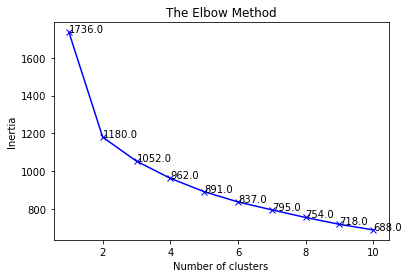

In [13]:
from sklearn.cluster import KMeans
X_Elbow = X.copy()
#X_Elbow_np = X_Elbow.to_numpy()
Cluster_Inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_Elbow.iloc[:,:10].values) # Instead of passing X which includes headers, I am just passing values in the X dataframe.
    #kmeans.fit(X_Elbow_np)
    Cluster_Inertia.append(kmeans.inertia_)

plt.plot(range(1,11), Cluster_Inertia, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# for displaying inertia values in the line plot to make it easy to understand.
for a,b in zip(range(1, 11), Cluster_Inertia): 
    plt.text(a, b, round(b,0))

    
plt.show()

# Finding K using calinski_harabasz_score

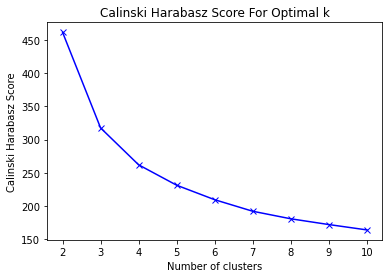

In [14]:
from sklearn.metrics import calinski_harabasz_score
X_Calinski = X.copy()
calinski = []
for k in range(2, 11):
    kmeans =KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_Calinski)
    labels = kmeans.labels_
    calinski.append(calinski_harabasz_score(X_Calinski, labels))

plt.plot(range(2,11),calinski,'bx-')
plt.xlabel('Number of clusters') 
plt.ylabel('Calinski Harabasz Score') 
plt.title('Calinski Harabasz Score For Optimal k')
plt.show()

# 2 clusters - as identified using elbow method

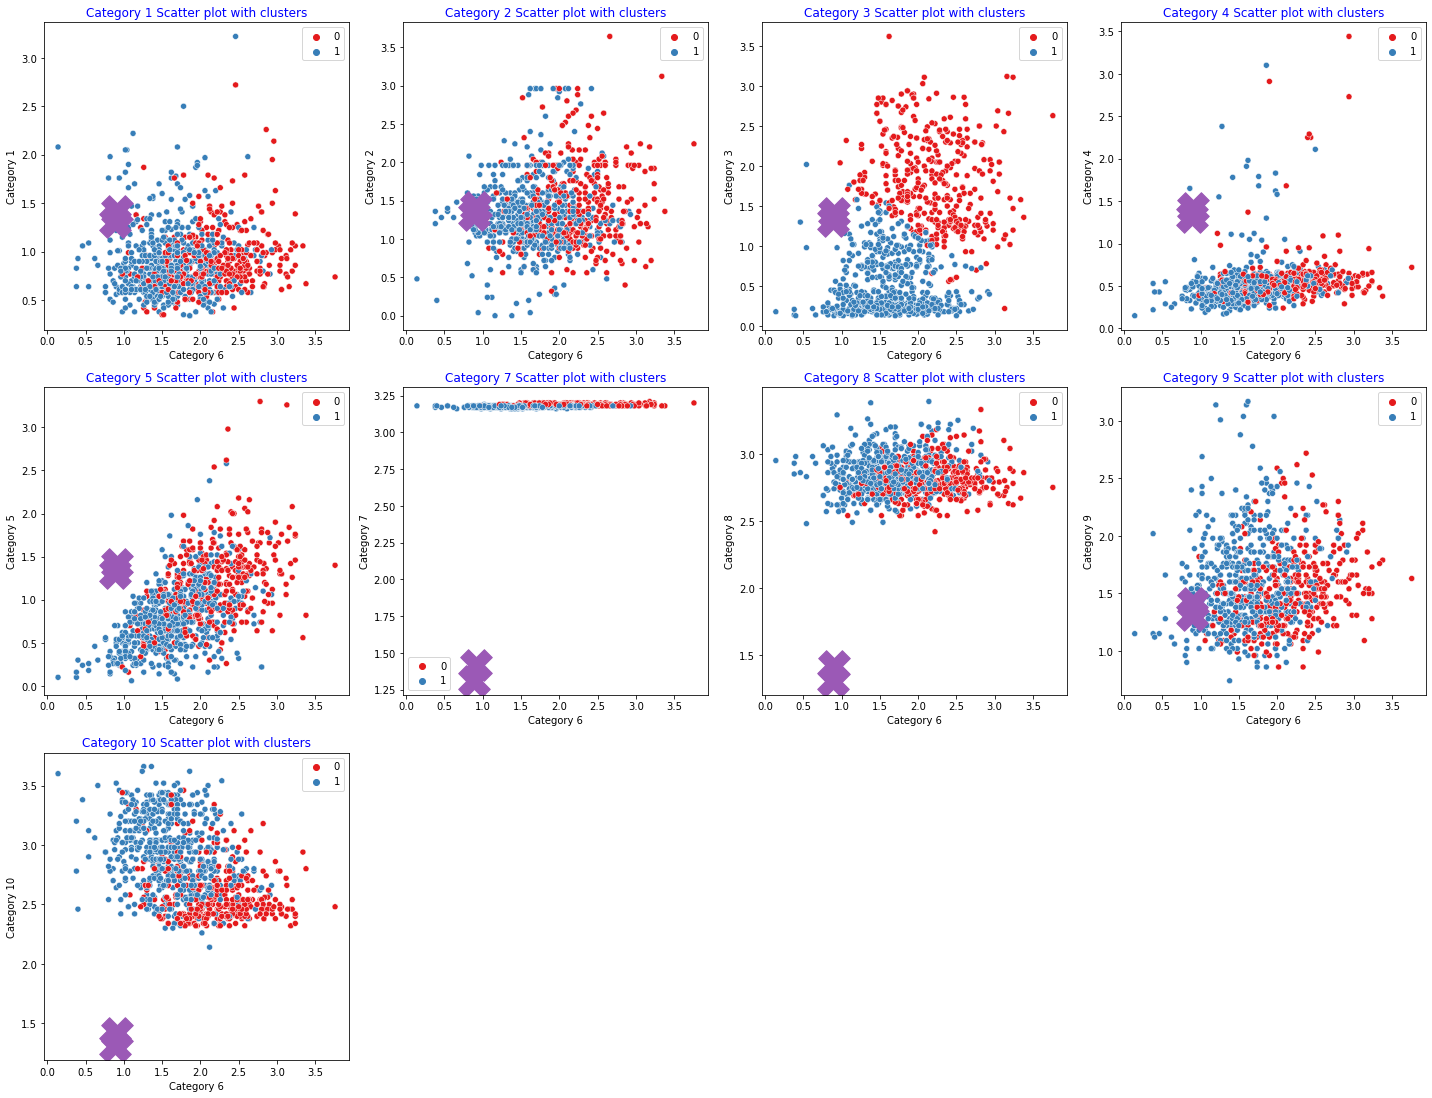

In [15]:
kmeans = KMeans(n_clusters=2, random_state = 42) 
kmeans.fit(X_Elbow) # we use .fit() to fit the data (learning)

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
features  = kmeans.n_features_in_

f=plt.figure(figsize=(20,20))

# Plotting scatter plots of all other 9 categories vs Category 1
for i, col in enumerate(X_Elbow.columns[~X_Elbow.columns.isin(['Category 6'])]):
    cluster=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=X_Elbow['Category 6'],y=X_Elbow[col],hue=labels,palette='Set1')
    cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 1000, marker = 'X')
    cluster.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

# Finding K using silhouette_score

[0.30085279300986595, 0.20456440205897788, 0.1641011320133975, 0.16437922957880385, 0.16454221783583406, 0.16284536799142732, 0.16414101328220343, 0.16649197720401449, 0.1616399767735611]


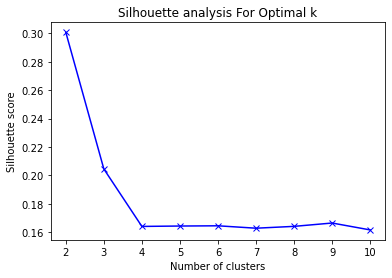

In [16]:
from sklearn.metrics import silhouette_score

X_Silhouette = X.copy()
silhouette_avg = []
for num_clusters in range(2,11):

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_Silhouette)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(X_Silhouette, cluster_labels, metric='euclidean'))
    

plt.plot(range(2,11),silhouette_avg,'bx-')
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
print(silhouette_avg)

plt.show()

# 3 clusters - as identified using silhouette method or Calinski Harabasz score above.

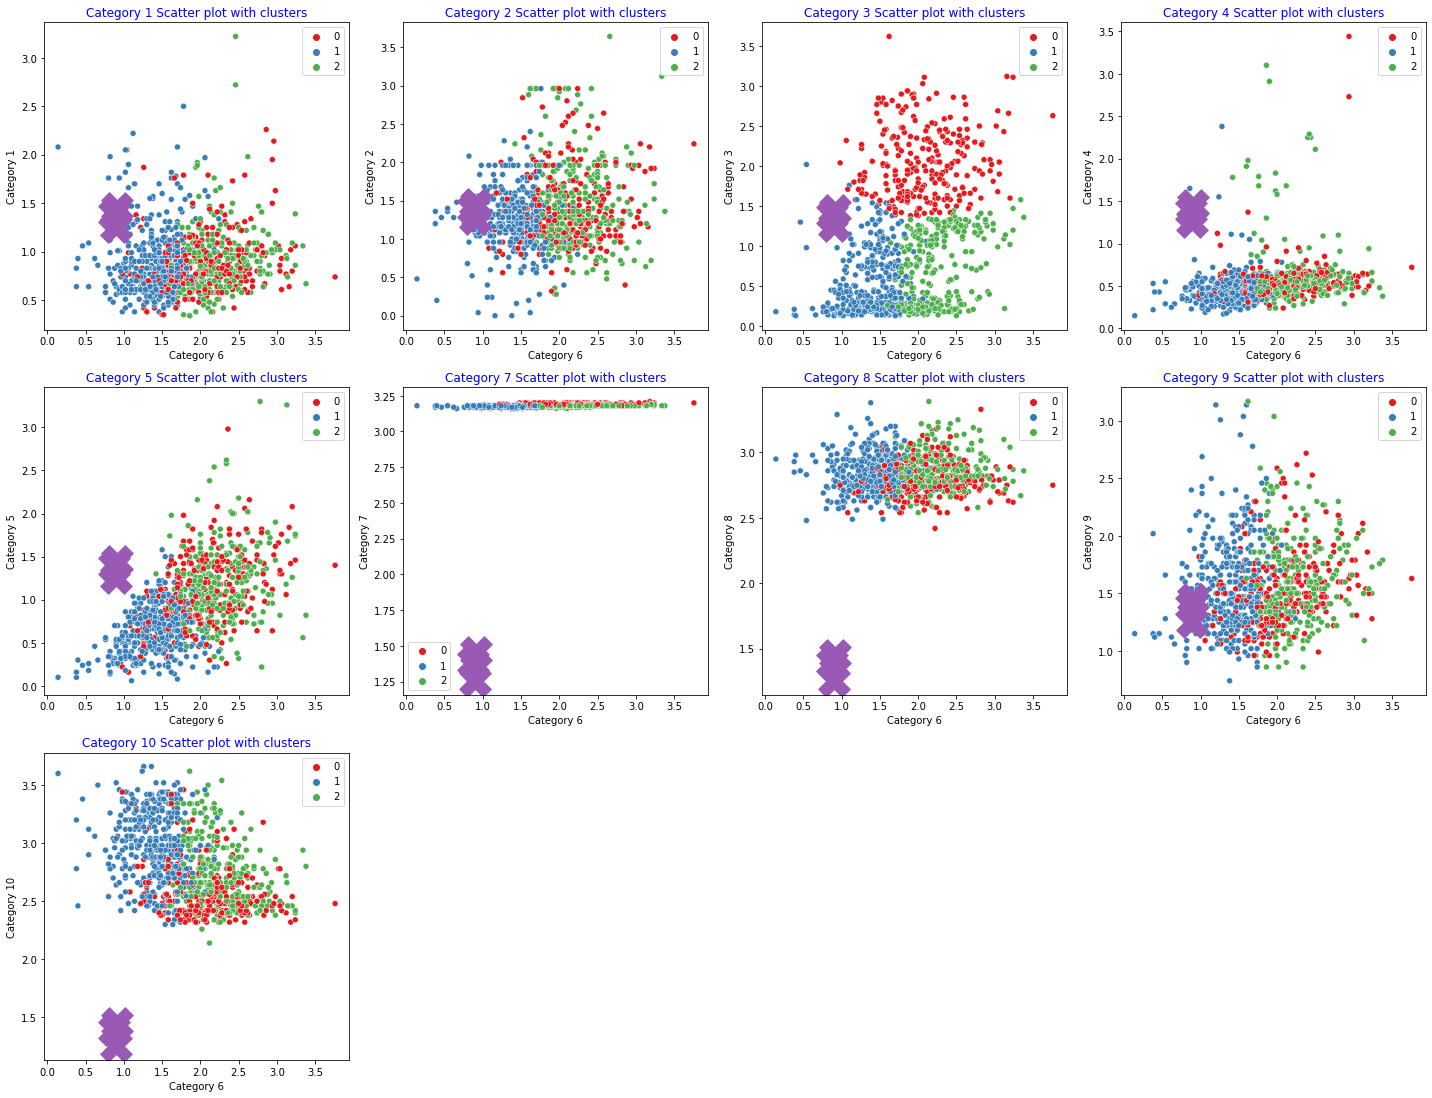

In [17]:
kmeans = KMeans(n_clusters=3, random_state = 42) 
# we use .fit() to fit the data (learning)
kmeans.fit(X_Silhouette) 

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
features  = kmeans.n_features_in_

f=plt.figure(figsize=(20,20))

# Plotting scatter plots of all other 9 categories vs Category 1
for i, col in enumerate(X_Silhouette.columns[~X_Silhouette.columns.isin(['Category 6'])]):
    cluster=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=X_Silhouette['Category 6'],y=X_Silhouette[col],hue=labels,palette='Set1')
    cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 1000, marker = 'X')
    cluster.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

# n_clusters - as identified using silhouette method above.

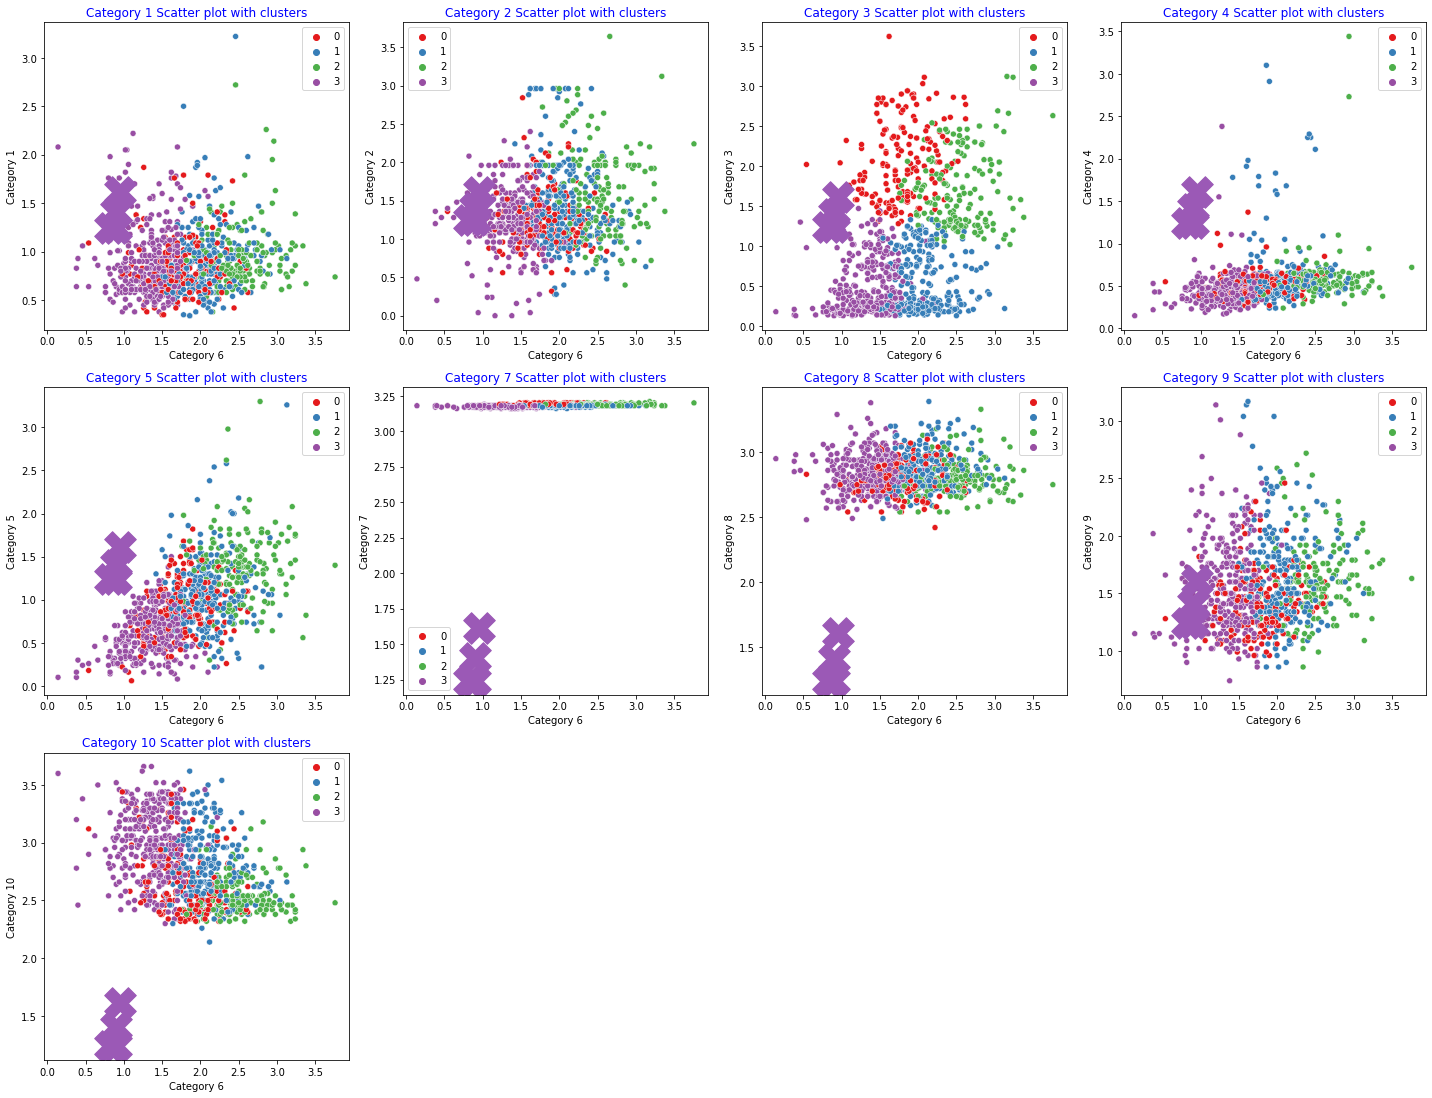

In [18]:
kmeans = KMeans(n_clusters=4, random_state = 42) 
# we use .fit() to fit the data (learning)
kmeans.fit(X_Silhouette) 

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
features  = kmeans.n_features_in_

f=plt.figure(figsize=(20,20))

# Plotting scatter plots of all other 9 categories vs Category 1
for i, col in enumerate(X_Silhouette.columns[~X_Silhouette.columns.isin(['Category 6'])]):
    cluster=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=X_Silhouette['Category 6'],y=X_Silhouette[col],hue=labels,palette='Set1')
    cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 1000, marker = 'X')
    cluster.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

# Applying Principal Component Analysis

In [19]:
# Standardization of data
from sklearn.preprocessing import StandardScaler

features = ['Category 1', 'Category 2', 'Category 3', 'Category 4','Category 5','Category 6','Category 7','Category 8','Category 9','Category 10']
X_PCA = X.copy()

# Standardize the features
X_PCA = StandardScaler().fit_transform(X_PCA)

# Preview X
pd.DataFrame(data=X_PCA, columns=features).head()

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0    0.112645    0.935887    1.619750    0.312960   -0.319608    1.070169   
1    0.388088    1.772644    2.089171    0.384494    1.098486    2.479500   
2    1.000186   -1.156005   -0.600487   -0.008942   -1.600466   -0.561689   
3   -1.356389    0.935887   -0.917663    0.134126   -1.097272   -0.598777   
4   -1.172760   -0.319248    0.211486    0.134126    1.372955    0.328415   

   Category 7  Category 8  Category 9  Category 10  
0    1.158657   -0.327872    0.687518    -1.180591  
1    3.716053   -1.492056    0.797274    -1.491908  
2   -0.120041   -0.255111   -0.711877    -0.931537  
3   -0.120041    0.909073    0.001540     0.189205  
4   -0.120041   -0.400634   -1.068585    -0.807010

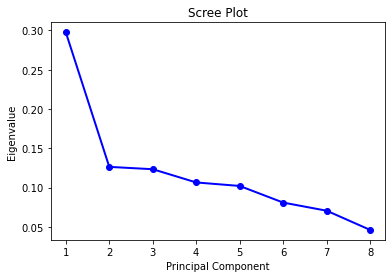

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.407573 -0.073039 -0.185360  0.162400 -0.840662  0.920314  0.414859   
1  5.311237 -0.022500 -0.654836 -0.034982 -0.225704  1.902050  0.303242   
2 -0.807839 -1.776951  0.850661  0.750597 -0.646349 -0.300083 -0.155406   
3 -1.065346  0.856401 -0.958654  0.126355 -1.201367 -0.782680  0.949553   
4  0.987246 -0.076777 -0.738679 -0.849947  0.849537 -1.401990 -0.568379   

        PC8  
0 -0.089752  
1 -0.134123  
2 -1.175285  
3 -0.308888  
4 -0.209762

In [20]:
from sklearn.decomposition import PCA
X_PCA_8 = X.copy()
X_PCA_8 = StandardScaler().fit_transform(X_PCA_8)
pca = PCA(n_components = 8)
principalComponents_8 = pca.fit_transform(X_PCA_8)

# Plot a scree plot

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

# Create a new dataset from principal components 
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']
principalComponents_df = pd.DataFrame(data = principalComponents_8, columns = columns)
principalComponents_df.head()

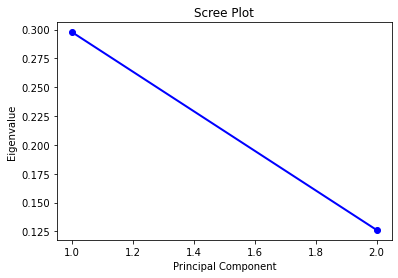

In [21]:
#2. PCA with 2 components 
X_PCA_2 = X.copy()
X_PCA_2 = StandardScaler().fit_transform(X_PCA_2)
pca = PCA(n_components = 2)
principalComponents_2 = pca.fit_transform(X_PCA_2)
#print(pca.components_)

# Plot a scree plot

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [22]:
# Create a new dataset from principal components 
columns = ['PC1','PC2']
principalComponents_df = pd.DataFrame(data = principalComponents_2, columns = columns)
principalComponents_df.head()

PC1       PC2
0  2.407573 -0.073039
1  5.311237 -0.022500
2 -0.807839 -1.776951
3 -1.065346  0.856401
4  0.987246 -0.076777

<Figure size 1440x1440 with 0 Axes>

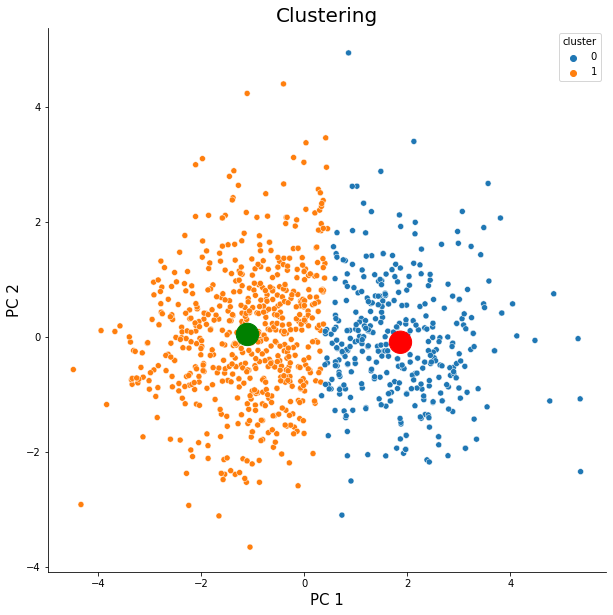

In [23]:
no_of_clusters = 2

kmeans = KMeans(n_clusters=no_of_clusters, random_state = 42)
kmeans.fit_transform(principalComponents_df) 

principalComponents_df['cluster'] = kmeans.labels_

f=plt.figure(figsize=(20,20))
palette = ['r','g','b','y']
colors = []
for i in range(0,no_of_clusters):
    colors.append(palette[i])
    

cluster = plt.subplots(figsize=(10, 10))
cluster = sns.scatterplot(x = 'PC1', y = 'PC2', data = principalComponents_df, hue = 'cluster')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], 
                 c = colors, s = 500, marker = 'o')

# coeff = np.transpose(pca.components_[0:2, :])
# n = coeff.shape[0]
# columns = list(X.columns)
# #print(principalComponents_df)
# for i in range(n):
#      plt.text(coeff[i,0]*3, coeff[i,1]*3, columns[i], size = 19,color = '#00586e')
    
    
sns.despine()
cluster.set_xlabel('PC 1', fontsize = 15)
cluster.set_ylabel('PC 2', fontsize = 15)
cluster.set_title('Clustering', fontsize = 20)
plt.show()

In [24]:
for i in range(1,11):
    pca = PCA(n_components= i)
    principalComponents = pca.fit_transform(X_PCA)
    Variance_Ratio = pca.explained_variance_ratio_
    print("No. of components:", i)
    print("Variance of each component:", pca.explained_variance_ratio_)
    Percentage_of_Variance = 0
    
    for j in range(len(pca.explained_variance_ratio_)):
        Percentage_of_Variance = Percentage_of_Variance + Variance_Ratio[j]
    
    print("Percentage of Variance:",round(Percentage_of_Variance * 100,2),"%\n")

No. of components: 1
Variance of each component: [0.29775044]
Percentage of Variance: 29.78 %

No. of components: 2
Variance of each component: [0.29775044 0.1262794 ]
Percentage of Variance: 42.4 %

No. of components: 3
Variance of each component: [0.29775044 0.1262794  0.12330993]
Percentage of Variance: 54.73 %

No. of components: 4
Variance of each component: [0.29775044 0.1262794  0.12330993 0.10644704]
Percentage of Variance: 65.38 %

No. of components: 5
Variance of each component: [0.29775044 0.1262794  0.12330993 0.10644704 0.10198197]
Percentage of Variance: 75.58 %

No. of components: 6
Variance of each component: [0.29775044 0.1262794  0.12330993 0.10644704 0.10198197 0.08079816]
Percentage of Variance: 83.66 %

No. of components: 7
Variance of each component: [0.29775044 0.1262794  0.12330993 0.10644704 0.10198197 0.08079816
 0.07044547]
Percentage of Variance: 90.7 %

No. of components: 8
Variance of each component: [0.29775044 0.1262794  0.12330993 0.10644704 0.10198197 

# Applying Factor Analysis

In [25]:
from sklearn.decomposition import FactorAnalysis
X_FA = X.copy()
# Standardize the features
X_FA = StandardScaler().fit_transform(X_FA)

# Preview X
pd.DataFrame(data=X_FA, columns=features).head()

transformer = FactorAnalysis(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(X_FA)
Factor = ['FA1','FA2','FA3']
X_transformed_FA = pd.DataFrame(data=X_transformed, columns = Factor)

<AxesSubplot:>

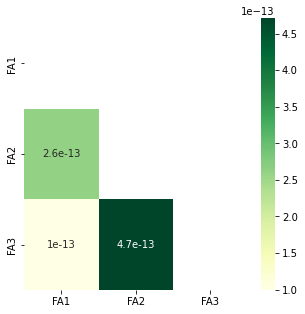

In [26]:
corr = X_transformed_FA.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='YlGn',annot=True)

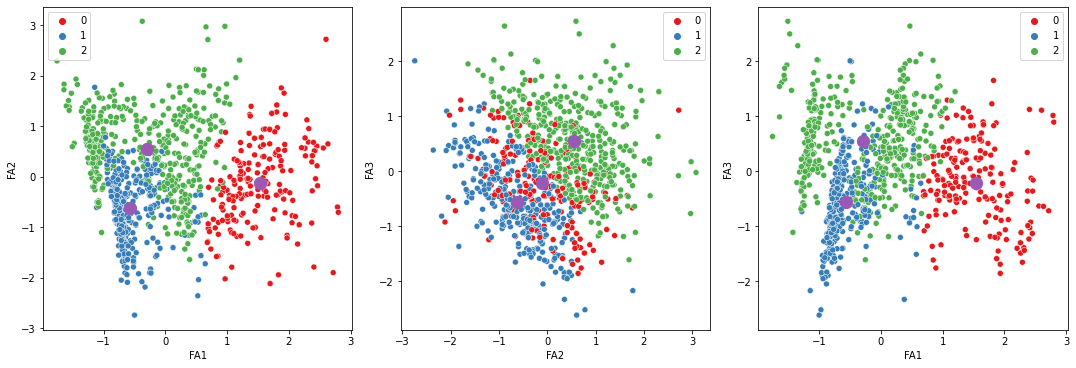

In [27]:
# Plotting scatter plot with 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 42) 
# we use .fit() to fit the data (learning)
kmeans.fit(X_transformed_FA) 

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
features  = kmeans.n_features_in_

f=plt.figure(figsize=(20,20))

cluster=f.add_subplot(4,4,1)
sns.scatterplot(x=X_transformed_FA['FA1'],y=X_transformed_FA['FA2'],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 150, marker = 'o')

cluster=f.add_subplot(4,4,2)
sns.scatterplot(x=X_transformed_FA['FA2'],y=X_transformed_FA['FA3'],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')

cluster=f.add_subplot(4,4,3)
sns.scatterplot(x=X_transformed_FA['FA1'],y=X_transformed_FA['FA3'],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')
    
f.tight_layout()

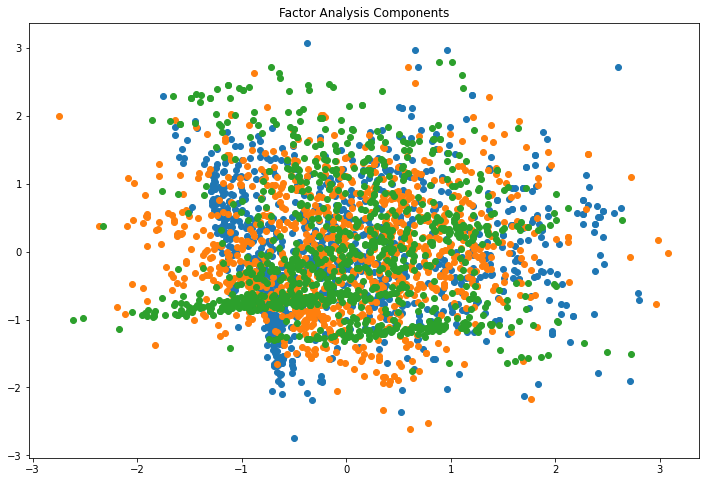

In [28]:
# Let's visualize all the components together
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(X_transformed_FA['FA1'], X_transformed_FA['FA2'])
plt.scatter(X_transformed_FA['FA2'], X_transformed_FA['FA3'])
plt.scatter(X_transformed_FA['FA3'],X_transformed_FA['FA1'])

# Applying ISOMAP

In [70]:
pip install manifold

In [30]:
from sklearn import manifold 
X_MANIFOLD = X.copy()

# Standardize the features
X_MANIFOLD = StandardScaler().fit_transform(X_MANIFOLD)

embedding = manifold.Isomap(n_neighbors=20, n_components=3, n_jobs=-1)

X_transformed_MANIFOLD = embedding.fit_transform(X_MANIFOLD)

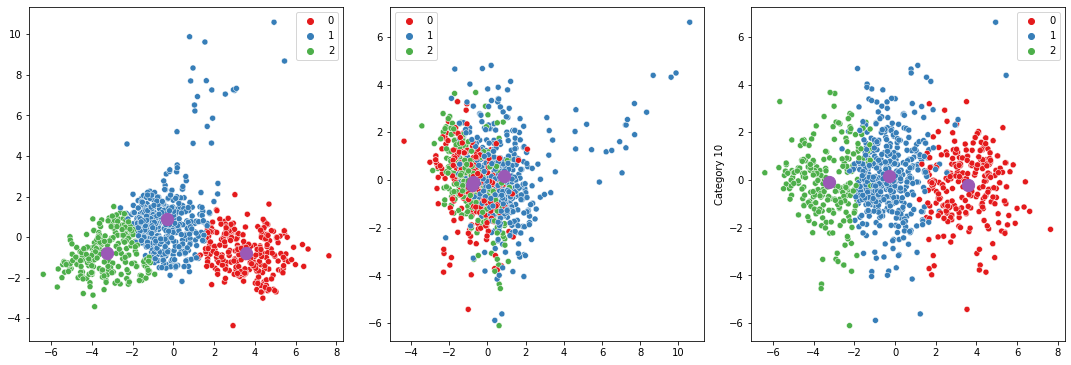

In [31]:
kmeans = KMeans(n_clusters=3, random_state = 42) #n_clusters - as identified using elbow method above.
kmeans.fit(X_transformed_MANIFOLD) # we use .fit() to fit the data (learning)

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
features  = kmeans.n_features_in_

f=plt.figure(figsize=(20,20))

cluster=f.add_subplot(4,4,1)
sns.scatterplot(x=X_transformed_MANIFOLD[:,0],y=X_transformed_MANIFOLD[:,1],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 150, marker = 'o')


cluster=f.add_subplot(4,4,2)
sns.scatterplot(x=X_transformed_MANIFOLD[:,1],y=X_transformed_MANIFOLD[:,2],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')


cluster=f.add_subplot(4,4,3)
sns.scatterplot(x=X_transformed_MANIFOLD[:,0],y=X_transformed_MANIFOLD[:,2],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')

    
plt.ylabel(col)
f.tight_layout()

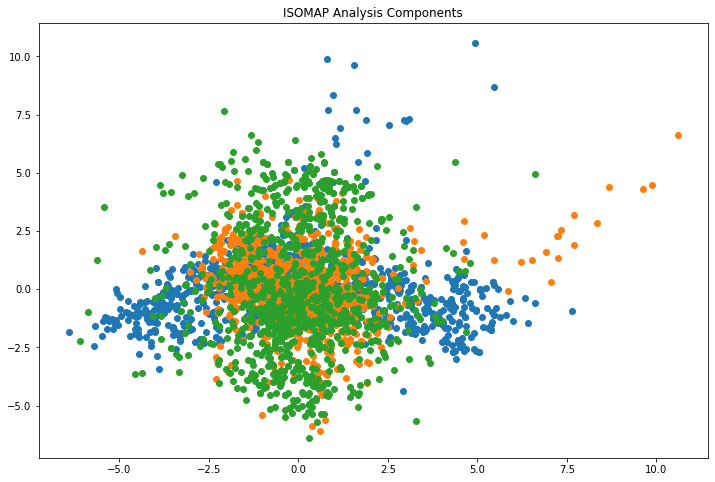

In [32]:
plt.figure(figsize=(12,8))
plt.title('ISOMAP Analysis Components')
plt.scatter(X_transformed_MANIFOLD[:,0], X_transformed_MANIFOLD[:,1])
plt.scatter(X_transformed_MANIFOLD[:,1], X_transformed_MANIFOLD[:,2])
plt.scatter(X_transformed_MANIFOLD[:,2],X_transformed_MANIFOLD[:,0])

# Applying UMAP

In [68]:
pip install umap

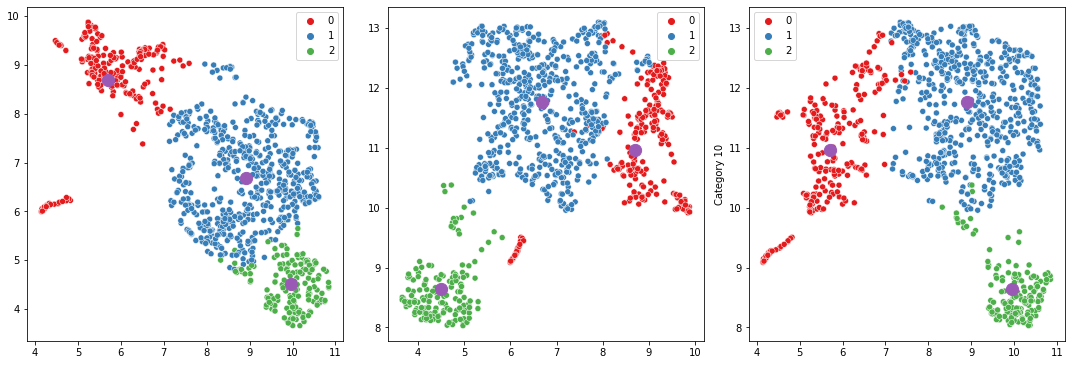

In [80]:
import umap.umap_ as umap

X_UMAP = X.copy()
# Standardize the features

X_UMAP = StandardScaler().fit_transform(X_UMAP)

umap_data = umap.UMAP(n_neighbors = 20, n_components=3, metric = 'chebyshev')

X_transformed = umap_data.fit_transform(X_UMAP)

kmeans = KMeans(n_clusters=3, random_state = 42) #n_clusters - as identified using elbow method above.
kmeans.fit(X_transformed) # We use .fit() to fit the data (learning)

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
features  = kmeans.n_features_in_

f=plt.figure(figsize=(20,20))

cluster=f.add_subplot(4,4,1)
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 150, marker = 'o')

cluster=f.add_subplot(4,4,2)
sns.scatterplot(x=X_transformed[:,1],y=X_transformed[:,2],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')

cluster=f.add_subplot(4,4,3)
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,2],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')
    
plt.ylabel(col)
f.tight_layout()

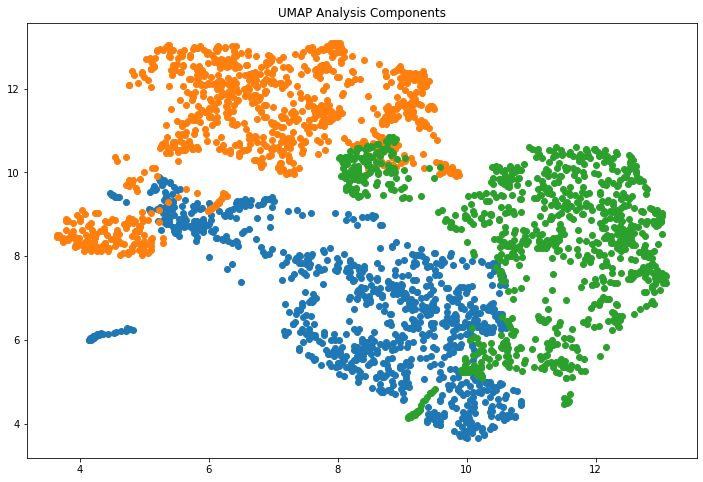

In [81]:
plt.figure(figsize=(12,8))
plt.title('UMAP Analysis Components')
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.scatter(X_transformed[:,1], X_transformed[:,2])
plt.scatter(X_transformed[:,2],X_transformed[:,0])

# Applying t-SNE

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


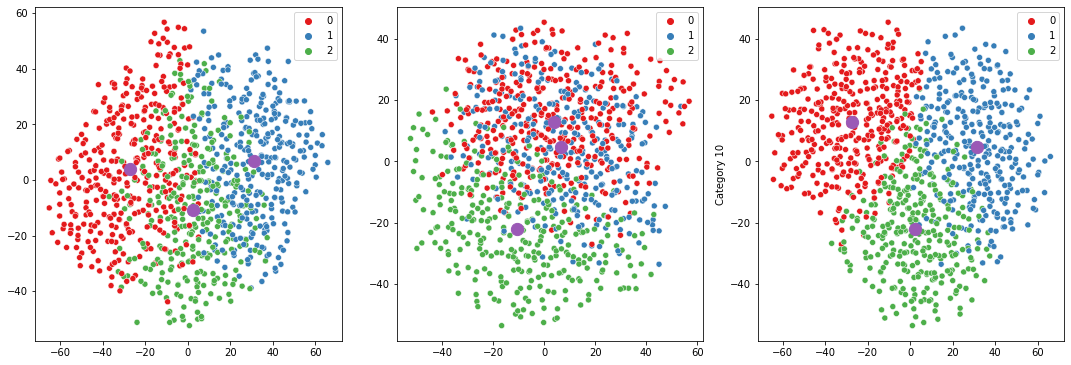

In [36]:
from sklearn.manifold import TSNE

X_TSNE = X.copy()
# Standardize the features
X_TSNE = StandardScaler().fit_transform(X_TSNE)

tsne = TSNE(n_components=3, perplexity=100, n_iter=5000)

X_transformed = tsne.fit_transform(X_TSNE)

kmeans = KMeans(n_clusters=3, random_state = 42) #n_clusters - as identified using elbow method above.
kmeans.fit(X_transformed) # We use .fit() to fit the data (learning)

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_
features  = kmeans.n_features_in_

f=plt.figure(figsize=(20,20))

cluster=f.add_subplot(4,4,1)
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 150, marker = 'o')

cluster=f.add_subplot(4,4,2)
sns.scatterplot(x=X_transformed[:,1],y=X_transformed[:,2],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')

cluster=f.add_subplot(4,4,3)
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,2],hue=labels,palette='Set1')
cluster.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], c = '#9b59b6', s = 150, marker = 'o')
    
plt.ylabel(col)
f.tight_layout()

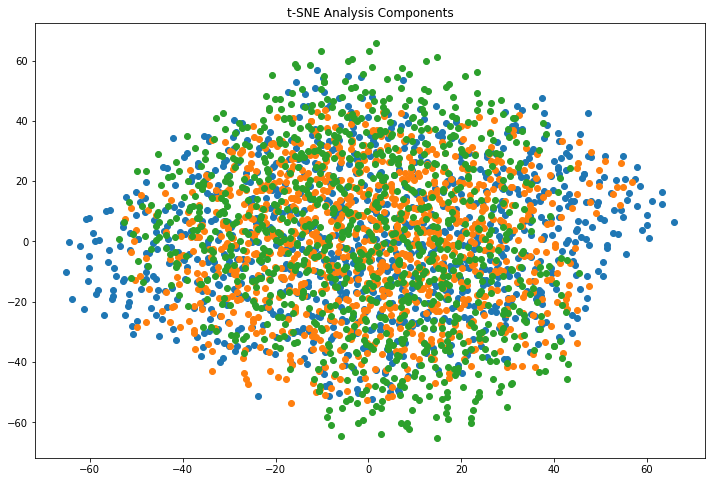

In [37]:
plt.figure(figsize=(12,8))
plt.title('t-SNE Analysis Components')
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.scatter(X_transformed[:,1], X_transformed[:,2])
plt.scatter(X_transformed[:,2],X_transformed[:,0])

# Q8(a)

In [38]:
No_of_neighbors = 5
No_of_components = 2 
No_of_jobs = 1
No_of_Clusters = 6 # k = 6 for k-Means
Perplexity = 100 # Used in t-SNE
No_of_iter = 5000 # Used in t-SNE

Silhouette Score:  0.48297761548188317
Calinski Harabasz: 60.55023297325022
Davies Bouldin: 0.6010267220570888


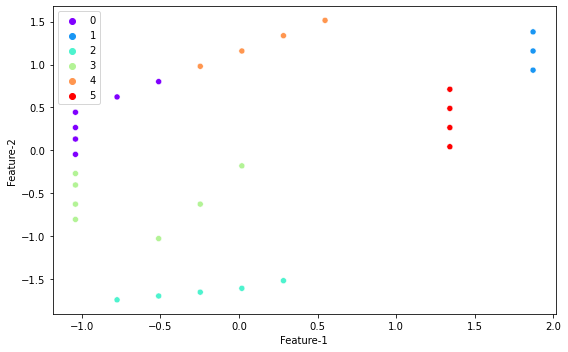

In [39]:
# Create a sample file and read it using Pandas’ read_csv function
# sample_df = pd.read_csv("sample.csv")
# X_Kmeans = sample_df.copy()

# Array of data points
sample_array =  np.array([[1,26],[1,30],[1,35],[1,38],[1,43],[1,47],[1,50],[1,54],[2,5],[2,58],
                         [3,6],[3,21],[3,62],[4,7],[4,30],[4,66],[5,8],[5,40],[5,70],[6,10],[6,74],[7,78],
                         [10,45],[10,50],[10,55],[10,60],[12,65],[12,70],[12,75]])

# Standardize the features
X_Kmeans_scaled = StandardScaler().fit_transform(sample_array)

#k-means clustering
kmeans = KMeans(n_clusters=No_of_Clusters, random_state = 42,algorithm = 'lloyd') 
kmeans.fit(X_Kmeans_scaled) 
kmeans.predict(X_Kmeans_scaled)

#Scatterplot for showing 6 clusters
f=plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=X_Kmeans_scaled[:,0],y=X_Kmeans_scaled[:,1],hue = kmeans.labels_, palette = 'rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
f.tight_layout()

from sklearn.metrics import davies_bouldin_score

print("Silhouette Score: ", silhouette_score(X_Kmeans_scaled,kmeans.labels_))
print("Calinski Harabasz:", calinski_harabasz_score(X_Kmeans_scaled,kmeans.labels_))
print("Davies Bouldin:", davies_bouldin_score(X_Kmeans_scaled,kmeans.labels_))

# 8(b)

# 1. DBSCAN (Density Based Spatial Clustering)

In [82]:
pip install DBSCAN

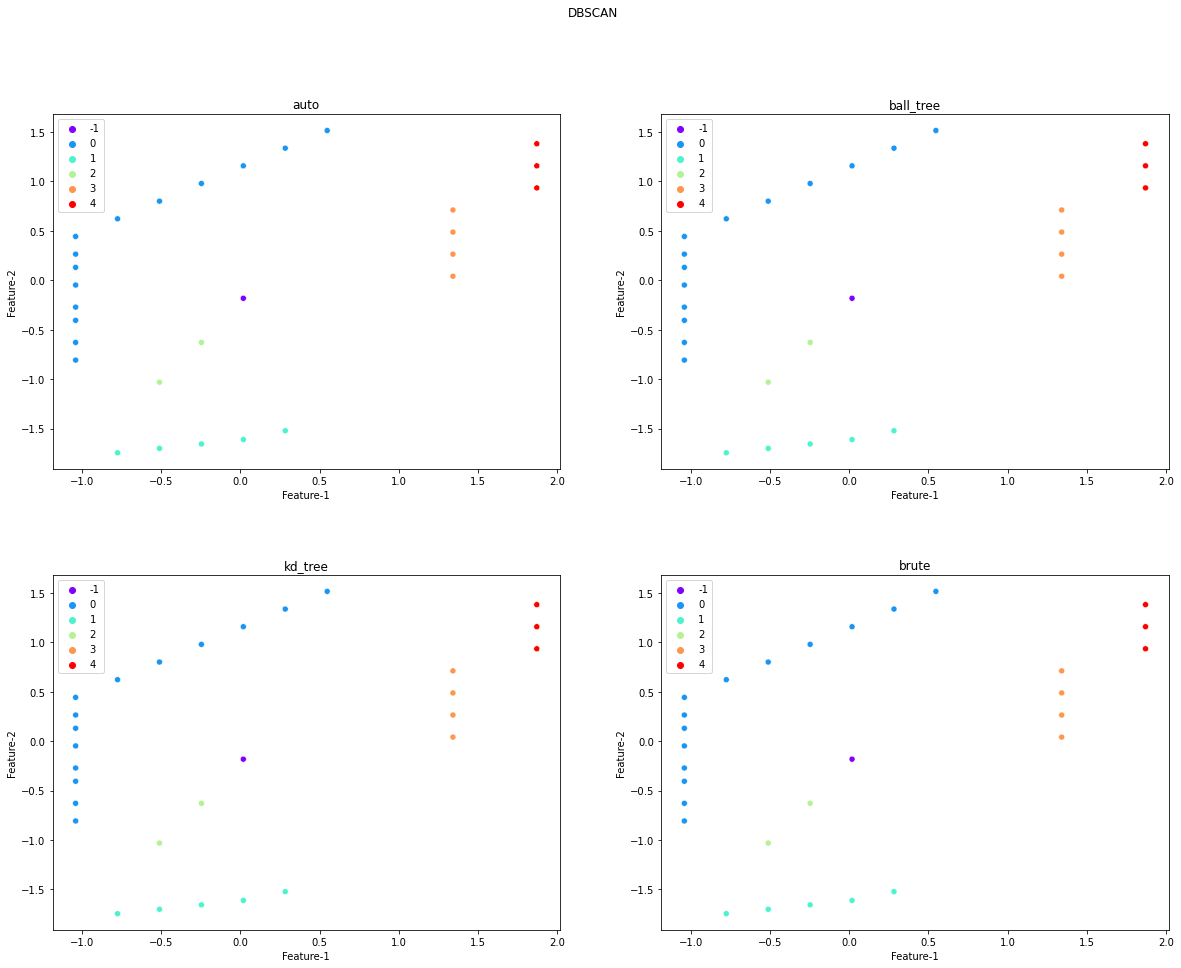

Silhouette Score:  0.23699585297698128
Calinski Harabasz: 16.75337396764892
Davies Bouldin: 0.7219212818158987


In [41]:
from sklearn.cluster import DBSCAN

#X_DBSCAN = sample_df.copy()
# Standardize the features
X_DBSCAN_scaled = StandardScaler().fit_transform(sample_array)

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle('DBSCAN')
algorithm = ['auto','ball_tree','kd_tree','brute']
cmap = ['rainbow','rainbow_r','ocean','ocean_r']
for i, (algo, cmap) in enumerate(zip(algorithm, cmap)):
    dbscan_model = DBSCAN(eps=0.5, min_samples=2, algorithm = algo)
    dbscan_model.fit(X_DBSCAN_scaled)
    
    cluster = dbscan_model.labels_
    
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=X_DBSCAN_scaled[:,0],y=X_DBSCAN_scaled[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    plt.title(algo)
plt.show()

print("Silhouette Score: ", silhouette_score(X_DBSCAN_scaled,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(X_DBSCAN_scaled,cluster))
print("Davies Bouldin:", davies_bouldin_score(X_DBSCAN_scaled,cluster))

# 2. BIRCH (Balanced Iterative Reducing and Clustering Using Hierarchies)

In [83]:
pip install Birch

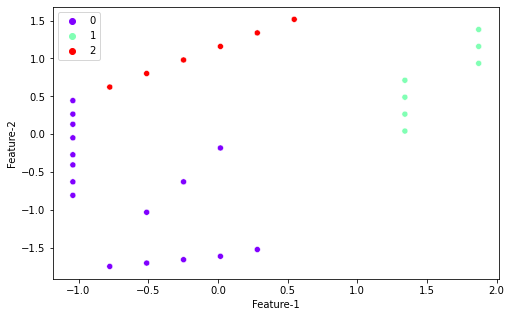

Silhouette Score:  0.46719999633155535
Calinski Harabasz: 35.46288329359887
Davies Bouldin: 0.6481987121230461


In [43]:
from sklearn.cluster import Birch

#X_BIRCH = sample_df.copy()

# Standardize the features
X_BIRCH_scaled = StandardScaler().fit_transform(sample_array)

# Plotting scatter plot
birch = Birch(threshold = 0.1, branching_factor = 50)
# we use .fit() to fit the data (learning)
birch.fit(X_BIRCH_scaled)

cluster = birch.labels_
#X_BIRCH['Cluster'] = cluster

fig = plt.figure(figsize=(8,5))

ax = sns.scatterplot(x=X_BIRCH_scaled[:,0],y=X_BIRCH_scaled[:,1],hue = cluster, palette = 'rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(X_BIRCH_scaled,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(X_BIRCH_scaled,cluster))
print("Davies Bouldin:", davies_bouldin_score(X_BIRCH_scaled,cluster))

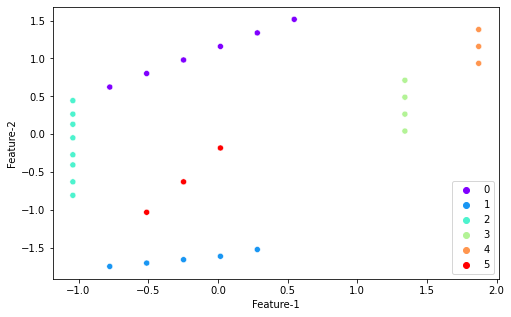

Silhouette Score:  0.4791707700755139
Calinski Harabasz: 51.96283496816749
Davies Bouldin: 0.5926909361233409


In [44]:
# X_BIRCH2 = sample_df.copy()

# Standardize the features
X_BIRCH2_scaled = StandardScaler().fit_transform(sample_array)

# Plotting scatter plot with 6 clusters
birch = Birch(threshold = 0.1, branching_factor = 50, n_clusters=No_of_Clusters)
# we use .fit() to fit the data (learning)
birch.fit(X_BIRCH2_scaled)

cluster = birch.labels_

fig = plt.figure(figsize=(8,5))

#plt.scatter(X_BIRCH_scaled[:,0], X_BIRCH_scaled[:,1], c=cluster, cmap='rainbow', alpha=1, edgecolors='b')
ax = sns.scatterplot(x=X_BIRCH2_scaled[:,0],y=X_BIRCH2_scaled[:,1],hue = cluster, palette = 'rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(X_BIRCH2_scaled,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(X_BIRCH2_scaled,cluster))
print("Davies Bouldin:", davies_bouldin_score(X_BIRCH2_scaled,cluster))

# 3. Gaussian Mixture Model

### a. Method: kmeans and all 4 covariance

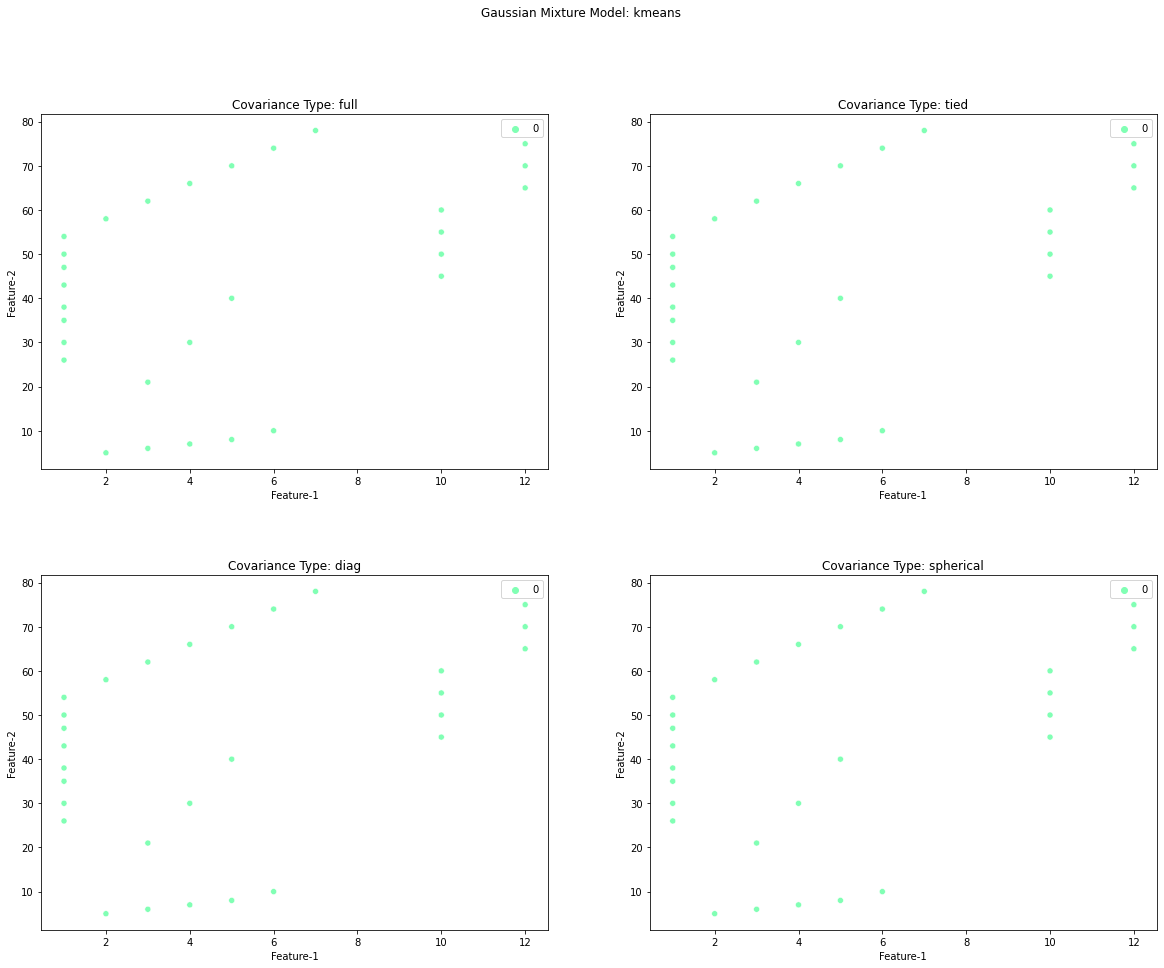

In [45]:
from sklearn.mixture import GaussianMixture

# X_GMM_1 = sample_df.copy()

covariance_type = ['full', 'tied', 'diag', 'spherical']
cmap = ['rainbow','rainbow_r','ocean','ocean_r']
init_params = ["kmeans", "random_from_data", "k-means++", "random"]

sup_title = 'Gaussian Mixture Model: ' + init_params[0]

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (cov, cmap) in enumerate(zip(covariance_type, cmap)):
    gaussian_model = GaussianMixture(covariance_type=cov, 
                                     init_params = init_params[0], reg_covar=1e-05, max_iter=2000)
    gaussian_model.fit(sample_array)
    cluster = gaussian_model.predict(sample_array)
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
#     w_factor = 0.2 / gaussian_model.weights_.max()
#     for pos, covar, w in zip(gaussian_model.means_, gaussian_model.covariances_, gaussian_model.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)
    i+=1
    cov_method = 'Covariance Type: ' + cov
    plt.title(cov_method)

plt.show()

### b. Method: random_from_data and all 4 covariance

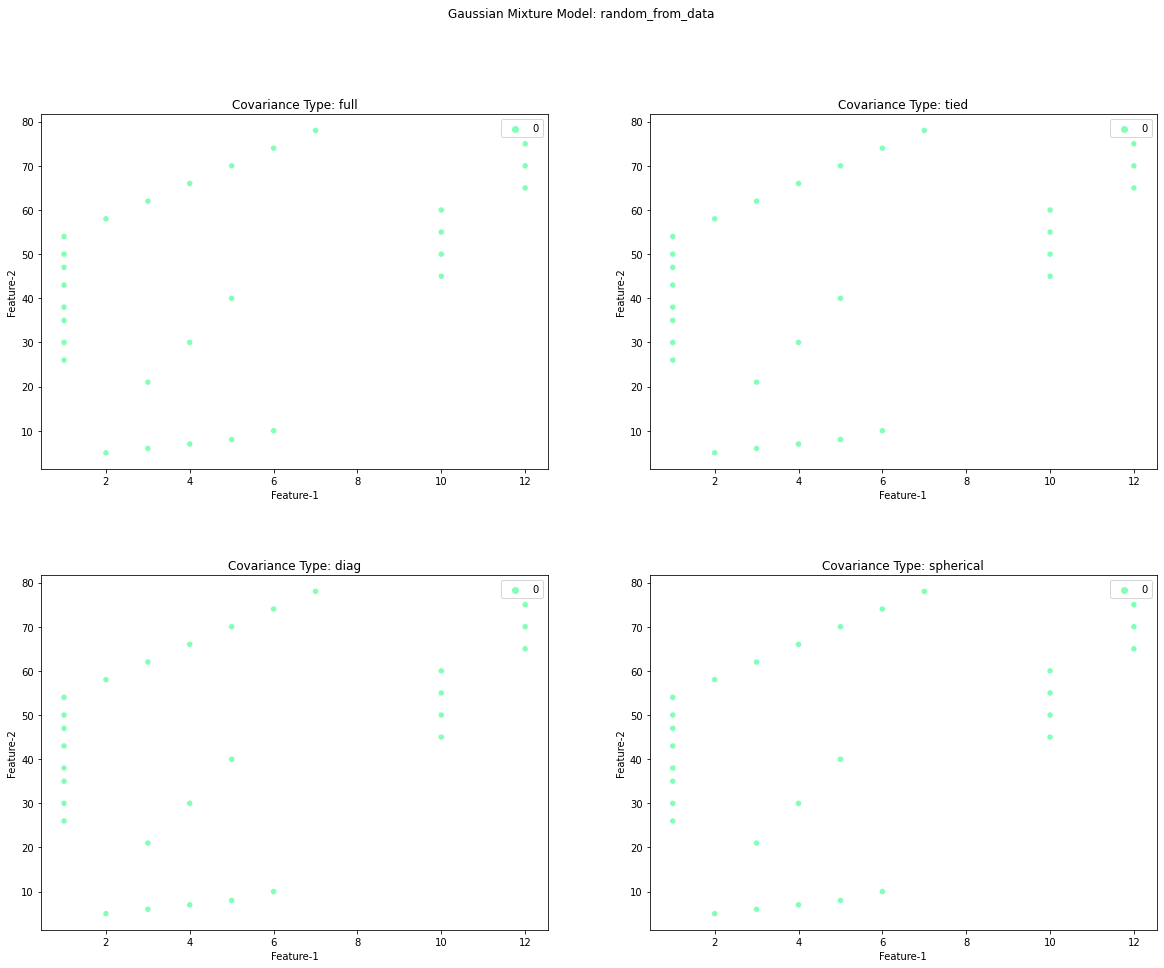

In [46]:
#X_GMM_2 = sample_df.copy()

cmap = ['rainbow','rainbow_r','ocean','ocean_r']

sup_title = 'Gaussian Mixture Model: ' + init_params[1]

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (cov, cmap) in enumerate(zip(covariance_type, cmap)):
    gaussian_model = GaussianMixture(covariance_type=cov, 
                                     init_params = init_params[1], reg_covar=1e-05, max_iter=2000)
    gaussian_model.fit(sample_array)
    cluster = gaussian_model.predict(sample_array)
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    cov_method = 'Covariance Type: ' + cov
    plt.title(cov_method)
plt.show()

### c. Method: k-means++ and all 4 covariance

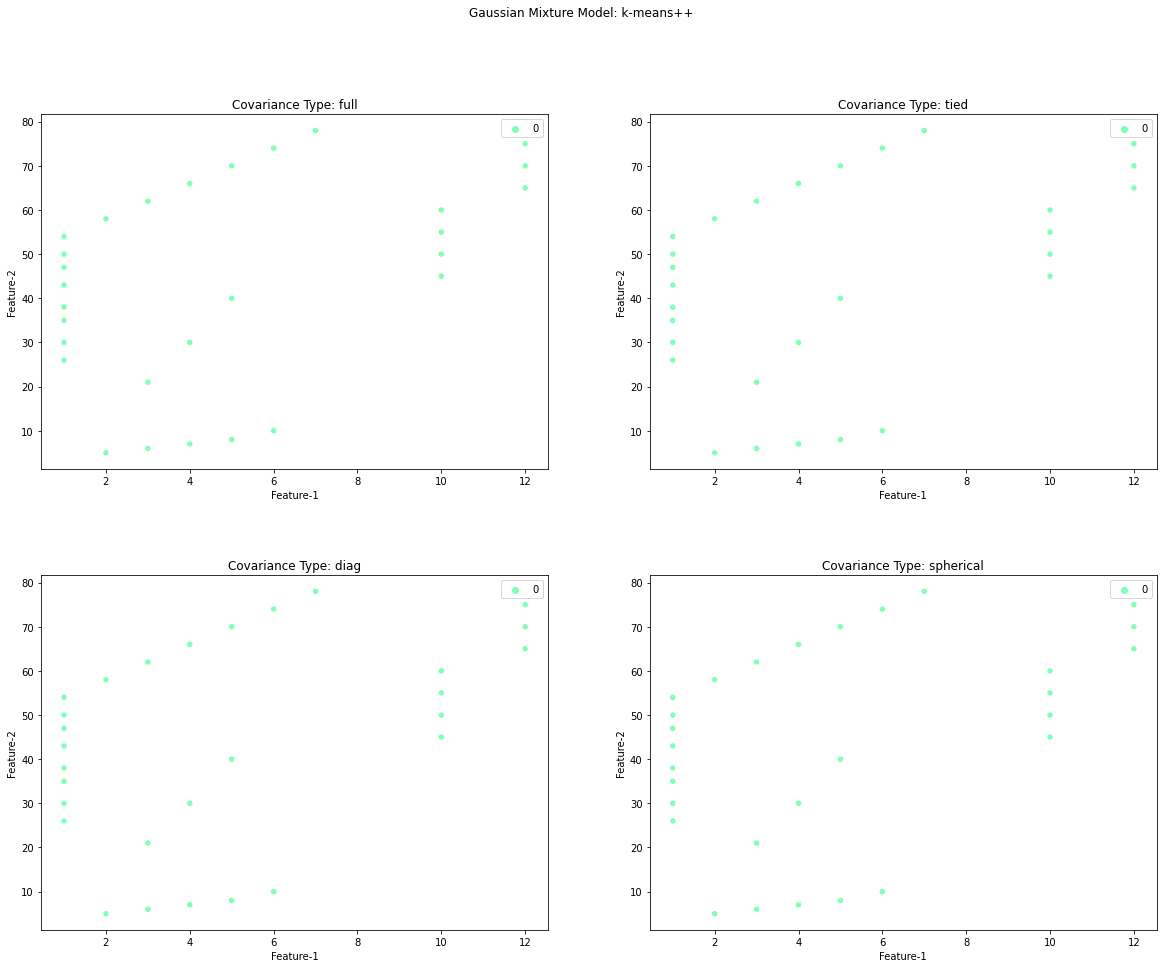

In [47]:
# X_GMM_3 = sample_df.copy()

cmap = ['rainbow','rainbow_r','ocean','ocean_r']

sup_title = 'Gaussian Mixture Model: ' + init_params[2]

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (cov, cmap) in enumerate(zip(covariance_type, cmap)):
    gaussian_model = GaussianMixture(covariance_type=cov, 
                                     init_params = init_params[2], reg_covar=1e-05, max_iter=2000)
    gaussian_model.fit(sample_array)
    cluster = gaussian_model.predict(sample_array)
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    cov_method = 'Covariance Type: ' + cov
    plt.title(cov_method)
plt.show()

### d. Method: random and all 4 covariance

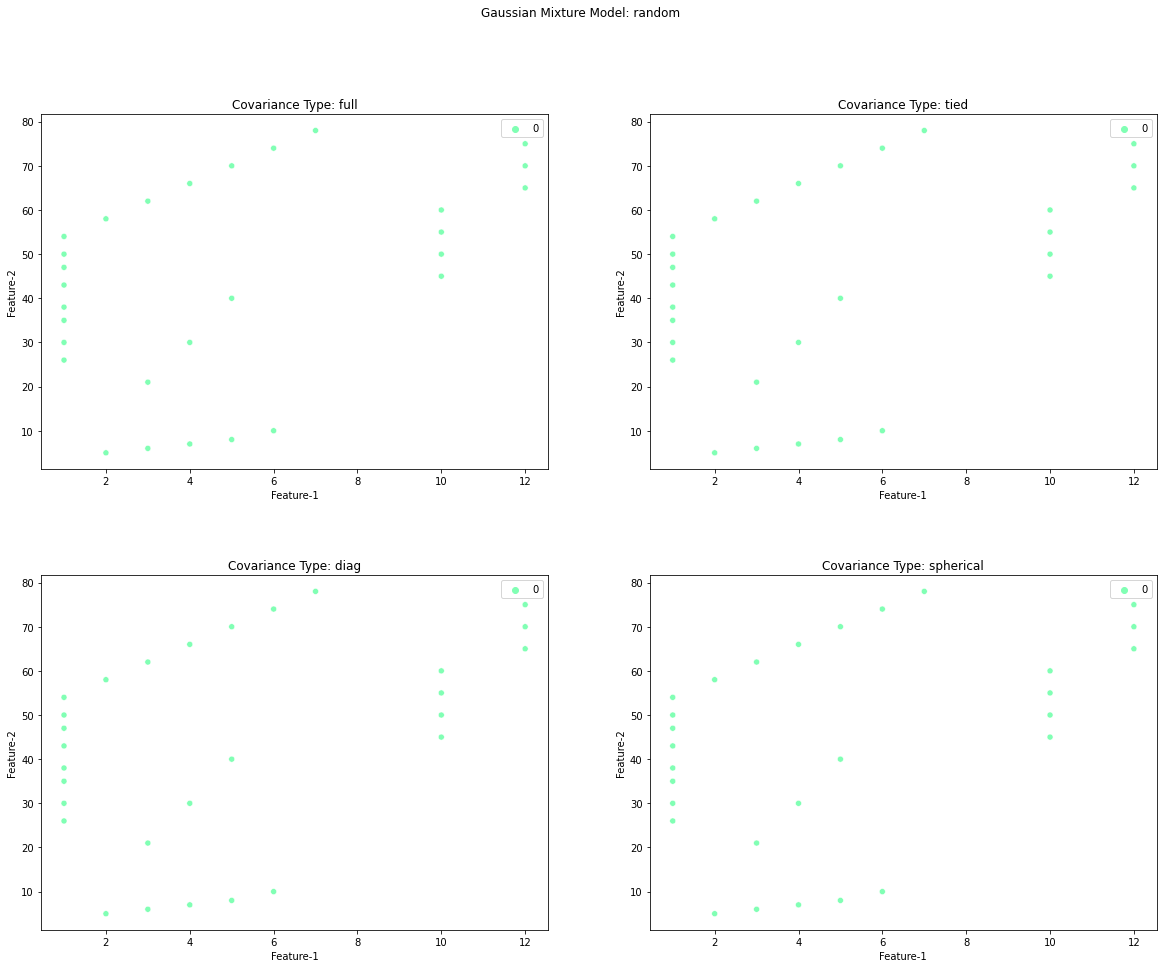

In [48]:
# X_GMM_4 = sample_df.copy()

cmap = ['rainbow','rainbow_r','ocean','ocean_r']

sup_title = 'Gaussian Mixture Model: ' + init_params[3]

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (cov, cmap) in enumerate(zip(covariance_type, cmap)):
    gaussian_model = GaussianMixture(covariance_type=cov, 
                                     init_params = init_params[3], reg_covar=1e-05, max_iter=2000)
    gaussian_model.fit(sample_array)
    cluster = gaussian_model.predict(sample_array)
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    cov_method = 'Covariance Type: ' + cov
    plt.title(cov_method)
plt.show()

# 4. Mean-Shift

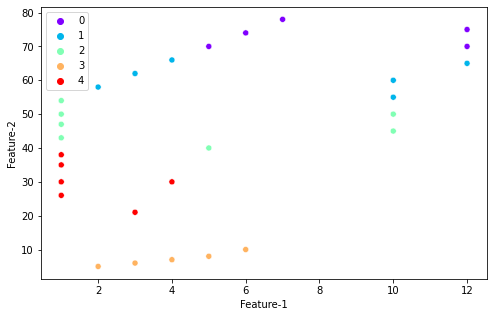

Silhouette Score:  0.4570870756667645
Calinski Harabasz: 115.60424222378424
Davies Bouldin: 0.645746201904352


In [49]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# X_MeanShift = sample_df.copy()

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(sample_array, quantile=0.2, n_samples=10)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True, cluster_all = True )
ms.fit(sample_array)
cluster = ms.labels_

fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(sample_array,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(sample_array,cluster))
print("Davies Bouldin:", davies_bouldin_score(sample_array,cluster))

# 5. OPTICS

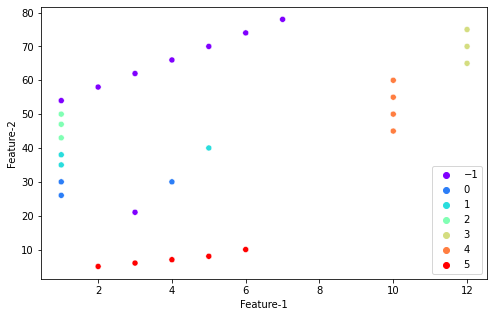

Silhouette Score:  0.252489175592231
Calinski Harabasz: 18.147206061807648
Davies Bouldin: 1.032272961845339


In [50]:
from sklearn.cluster import OPTICS

# X_OPTICS = sample_df.copy()

#Building the OPTICS Clustering model
optics_model = OPTICS(min_samples = 2, xi = 0.05, min_cluster_size = 0.01)

#Training the model
optics_model.fit(sample_array)
cluster = optics_model.labels_

fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(sample_array,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(sample_array,cluster))
print("Davies Bouldin:", davies_bouldin_score(sample_array,cluster))

# 6. Spectral Clustering

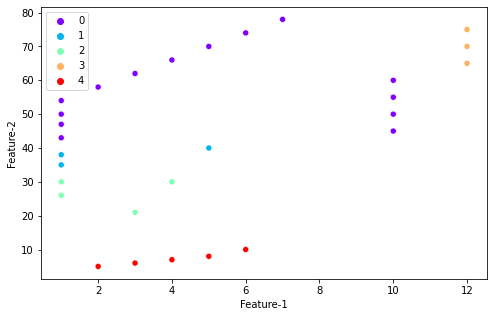

Silhouette Score:  0.2390162394173905
Calinski Harabasz: 41.35149830792168
Davies Bouldin: 0.6787061879782182


In [51]:
from sklearn.cluster import SpectralClustering

# X_SPEC = sample_df.copy()

spec = SpectralClustering(n_clusters = No_of_Clusters, assign_labels = 'discretize')

#Training the model
spec.fit(sample_array)
cluster = spec.labels_

fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(sample_array,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(sample_array,cluster))
print("Davies Bouldin:", davies_bouldin_score(sample_array,cluster))

# a. Label= 'kmeans' and all 3 eigen solvers

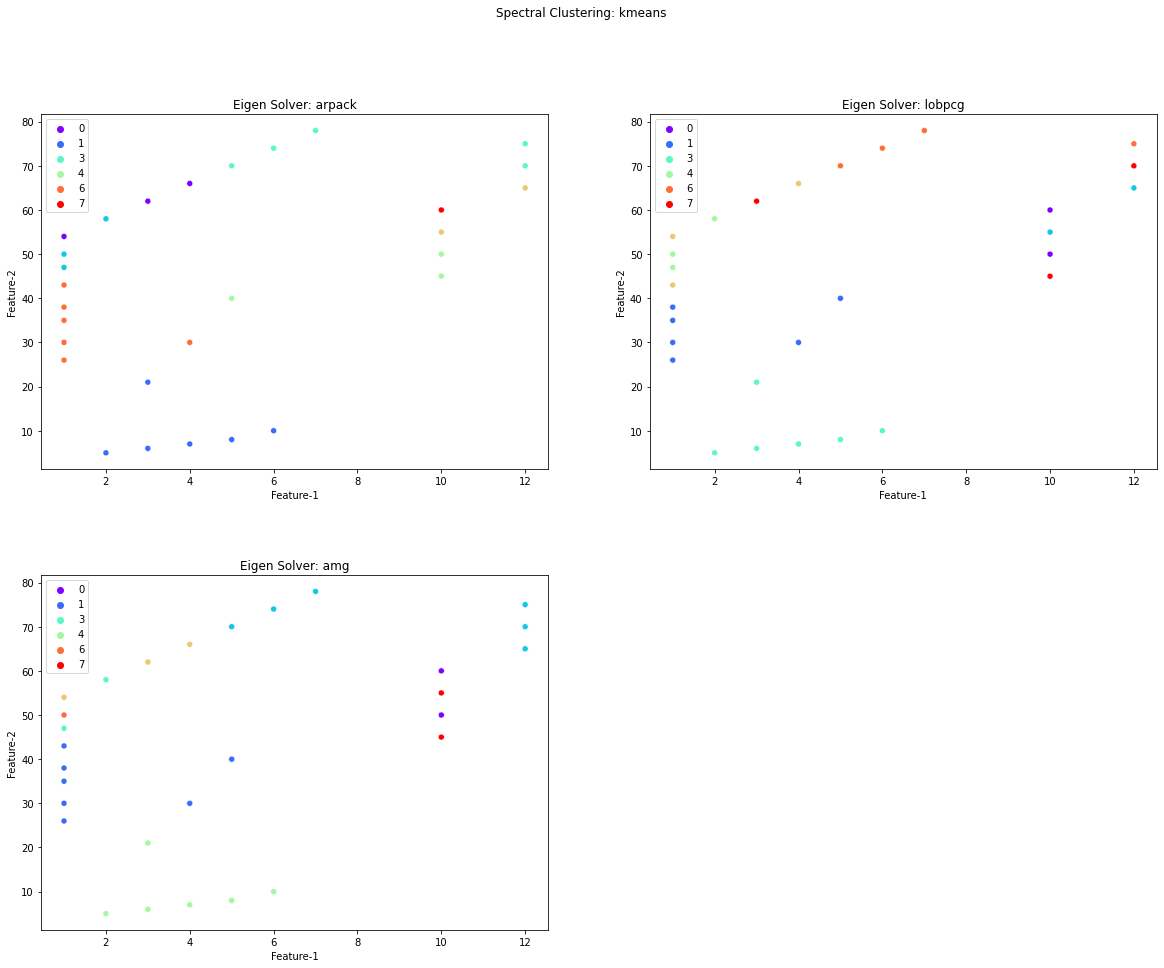

In [52]:
# X_SPEC_1 = sample_df.copy()

eigen_solver = ['arpack', 'lobpcg', 'amg']
cmap = ['rainbow','rainbow_r','ocean']
assign_labels = ["kmeans", "discretize", "cluster_qr"]

sup_title = 'Spectral Clustering: ' + assign_labels[0]

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (eg, cmap) in enumerate(zip(eigen_solver, cmap)):
    spec = SpectralClustering(eigen_solver=eg, 
                                     assign_labels = assign_labels[0], affinity = 'nearest_neighbors')
    spec.fit(sample_array)
    cluster = spec.labels_ 
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    eg_method = 'Eigen Solver: ' + eg
    plt.title(eg_method)
plt.show()

# b. Label= 'discretize' and all 3 eigen solvers

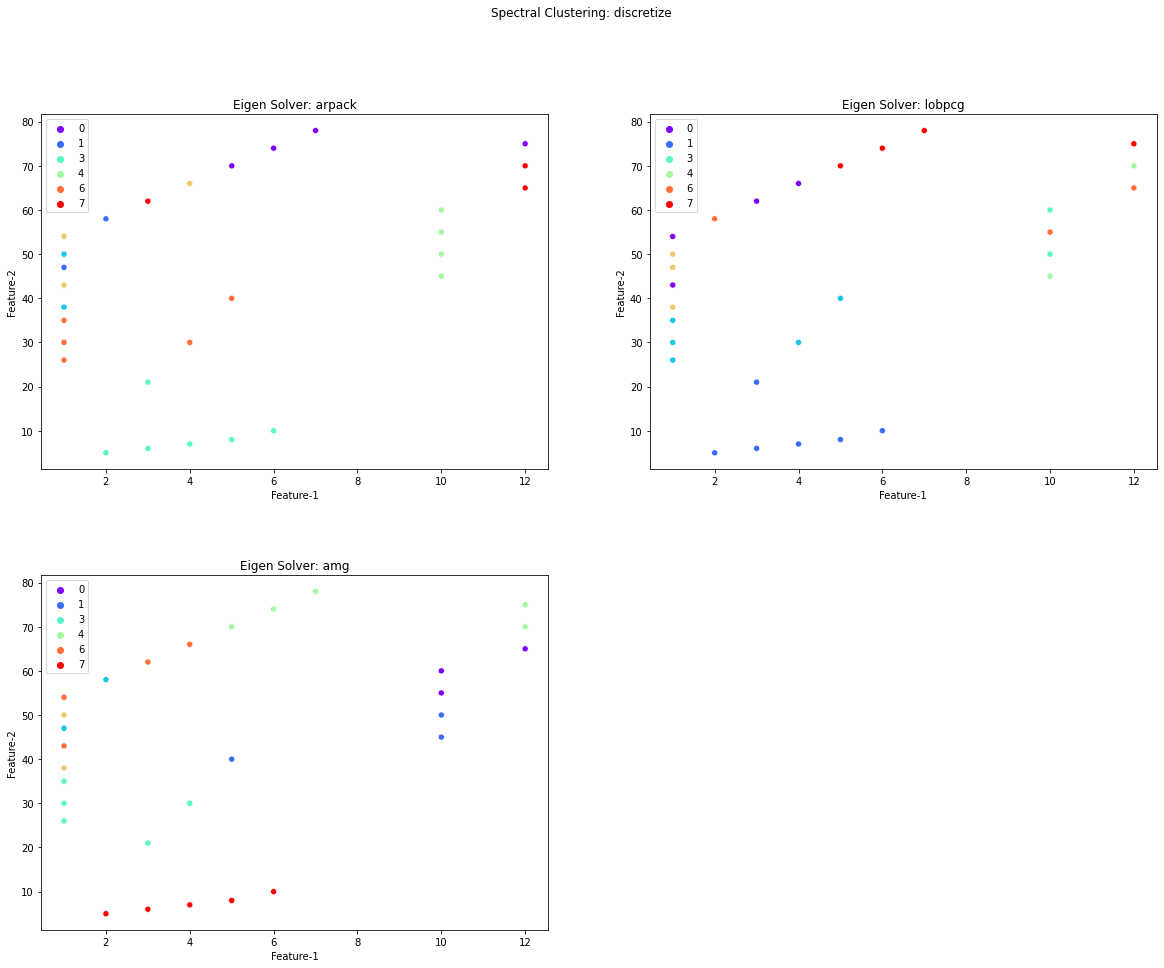

In [53]:
# X_SPEC_2 = sample_df.copy()

cmap = ['rainbow','rainbow_r','ocean']

sup_title = 'Spectral Clustering: ' + assign_labels[1]

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (eg, cmap) in enumerate(zip(eigen_solver, cmap)):
    spec = SpectralClustering(eigen_solver=eg, 
                                     assign_labels = assign_labels[1], affinity = 'nearest_neighbors')
    spec.fit(sample_array)
    cluster = spec.labels_ 
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    eg_method = 'Eigen Solver: ' + eg
    plt.title(eg_method)
plt.show()

# c. Label= 'cluster_qr' and all 3 eigen solvers

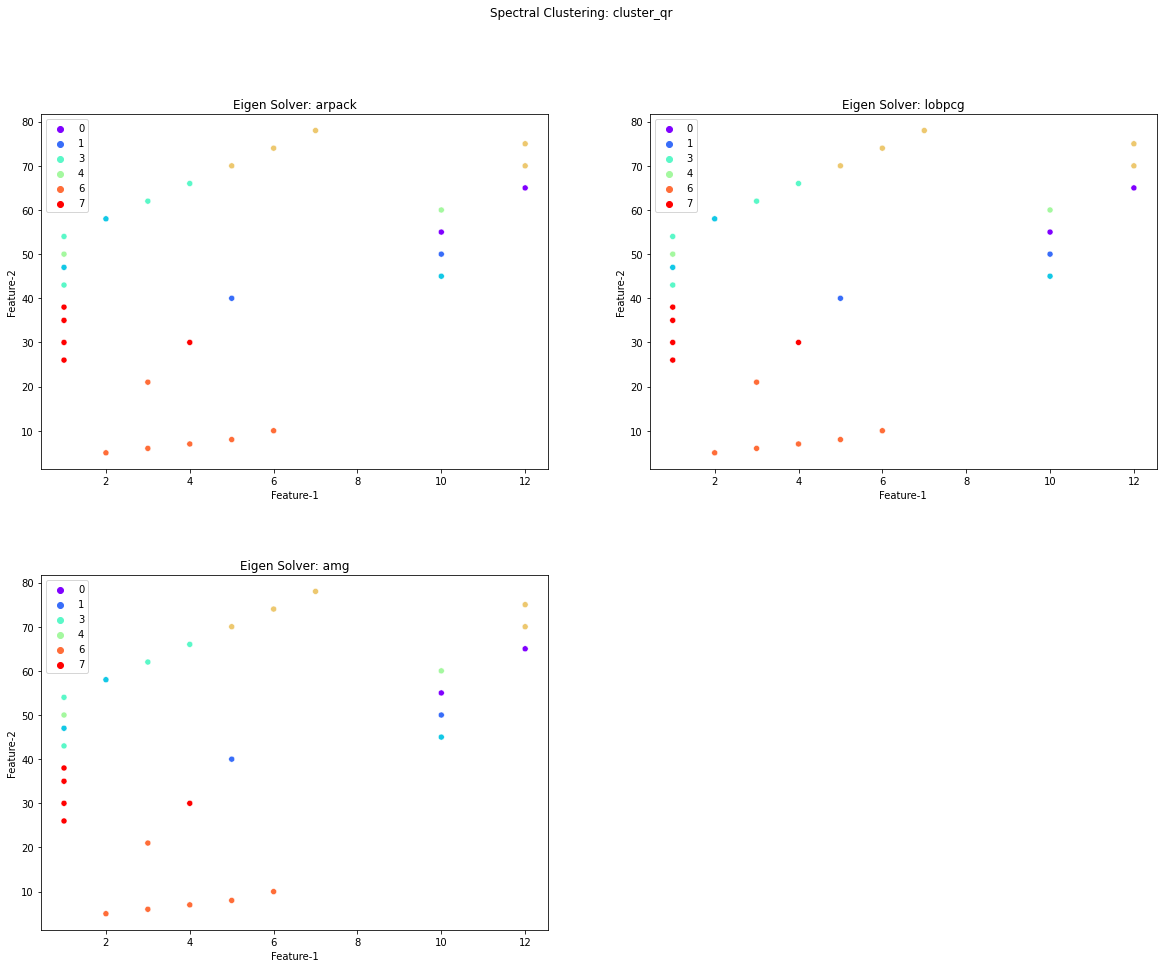

In [54]:
# X_SPEC_3 = sample_df.copy()

cmap = ['rainbow','rainbow_r','ocean']

sup_title = 'Spectral Clustering: ' + assign_labels[2]

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (eg, cmap) in enumerate(zip(eigen_solver, cmap)):
    spec = SpectralClustering(eigen_solver=eg, 
                                     assign_labels = assign_labels[2],affinity = 'nearest_neighbors')
    spec.fit(sample_array)
    cluster = spec.labels_ 
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    eg_method = 'Eigen Solver: ' + eg
    plt.title(eg_method)
plt.show()

# 7. Agglomerative Clustering

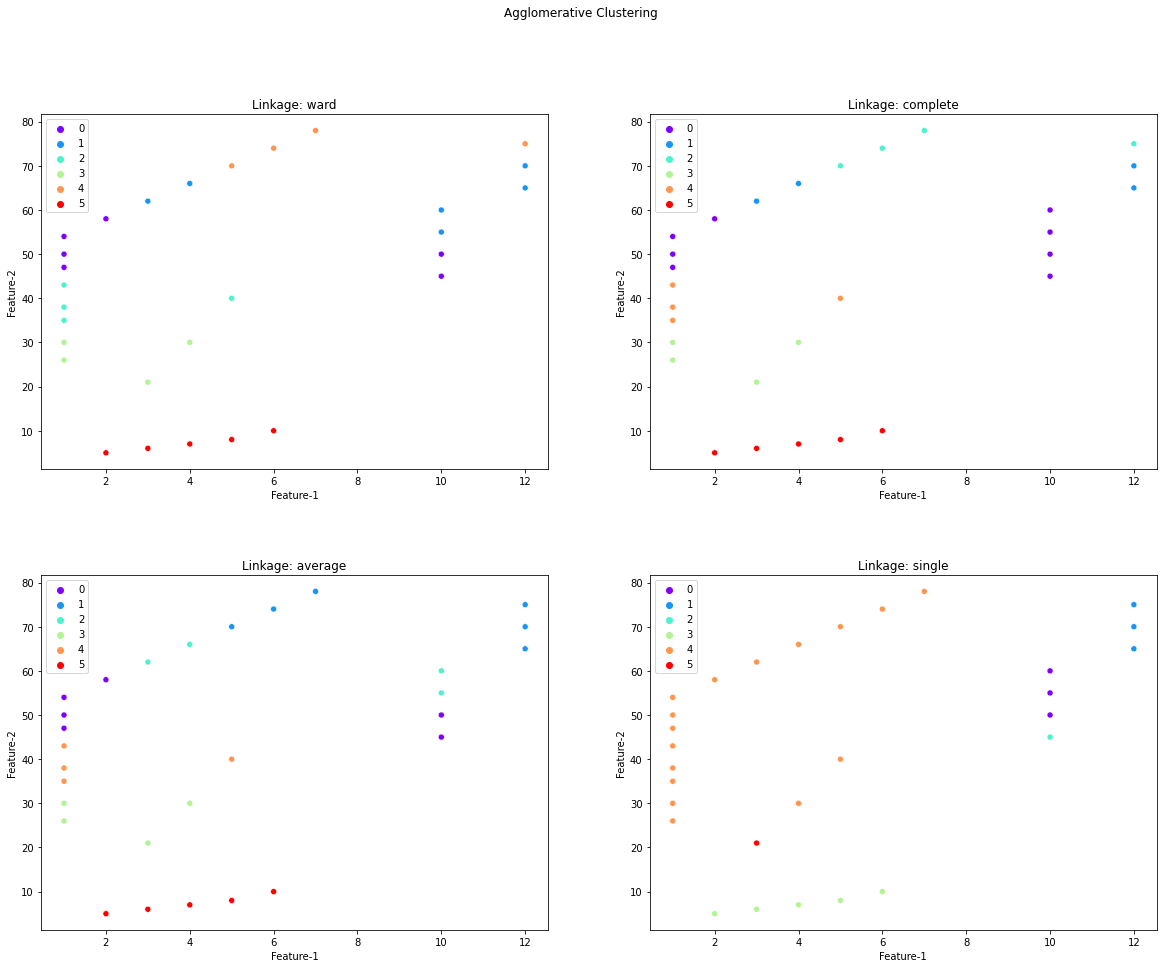

In [55]:
from sklearn.cluster import AgglomerativeClustering

# X_AG = sample_df.copy()

linkage = ['ward', 'complete', 'average', 'single']
cmap = ['rainbow','rainbow_r','ocean','ocean_r']

sup_title = 'Agglomerative Clustering'

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (link, cmap) in enumerate(zip(linkage, cmap)):
    AG = AgglomerativeClustering(n_clusters = No_of_Clusters,linkage = link, affinity = 'euclidean')
    AG.fit(sample_array)
    cluster = AG.labels_ 
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    linkage = 'Linkage: ' + link
    plt.title(linkage)
plt.show()

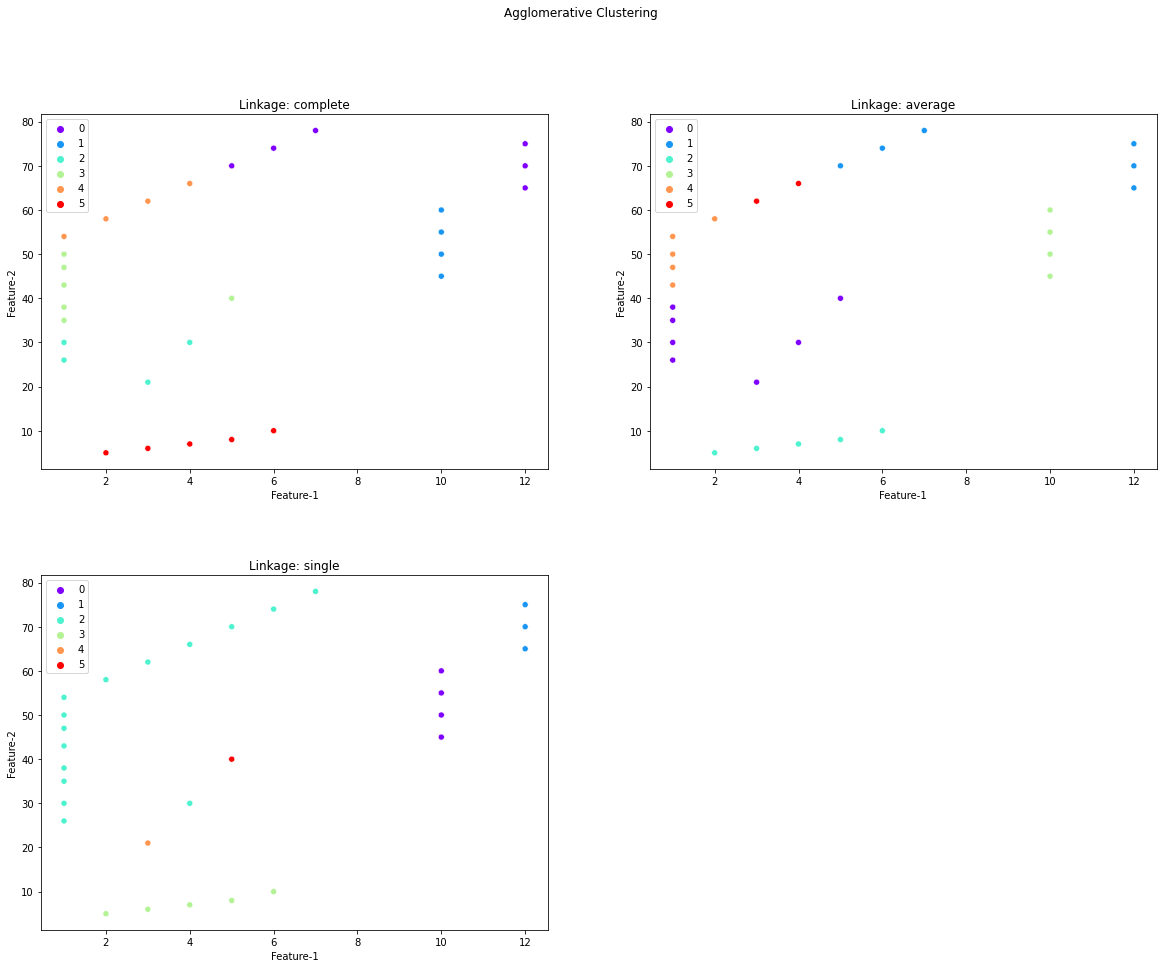

In [56]:
# Except Ward linkage
# X_AG = sample_df.copy()

linkage = [ 'complete', 'average', 'single']
cmap = ['rainbow_r','ocean','ocean_r']

sup_title = 'Agglomerative Clustering'

plt.subplots(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle(sup_title)
        
for i, (link, cmap) in enumerate(zip(linkage, cmap)):
    AG = AgglomerativeClustering(n_clusters = No_of_Clusters,linkage = link, affinity = 'l1')
    AG.fit(sample_array)
    cluster = AG.labels_ 
    plt.subplot(2,2,i+1)
    ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
    ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
    i+=1
    linkage = 'Linkage: ' + link
    plt.title(linkage)
plt.show()

# 8. Affinity Propagation

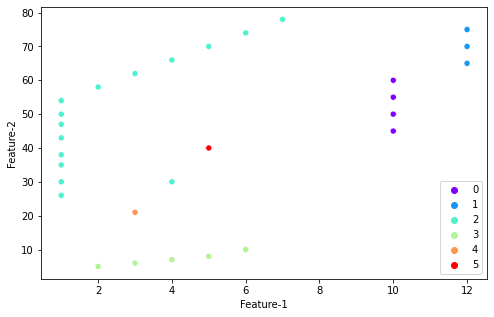

Silhouette Score:  -0.0718343720468243
Calinski Harabasz: 11.408518357005837
Davies Bouldin: 1.353229215751561


In [57]:
from sklearn.cluster import AffinityPropagation

# X_AP = sample_df.copy()


AP = AffinityPropagation(random_state = 42, damping = 0.5)
AP.fit(sample_array)
cluster = AG.labels_ 

fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(sample_array,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(sample_array,cluster))
print("Davies Bouldin:", davies_bouldin_score(sample_array,cluster))

# 9. Fuzzy C-Means

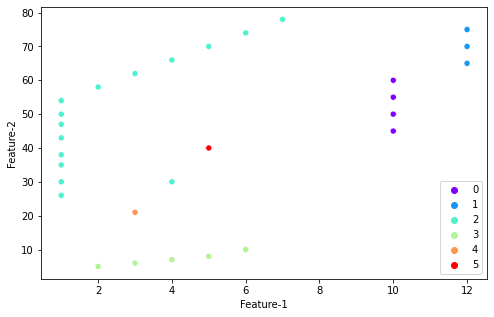

Silhouette Score:  -0.0718343720468243
Calinski Harabasz: 11.408518357005837
Davies Bouldin: 1.353229215751561


In [58]:
from fcmeans import FCM

# X_Fuzzy = sample_df.copy()
# X_Fuzzy_np = X_Fuzzy.to_numpy()

fcm = FCM(n_clusters=No_of_Clusters)
fcm.fit(sample_array)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(sample_array)


fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(sample_array,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(sample_array,cluster))
print("Davies Bouldin:", davies_bouldin_score(sample_array,cluster))

# 10. MiniBatch Kmeans

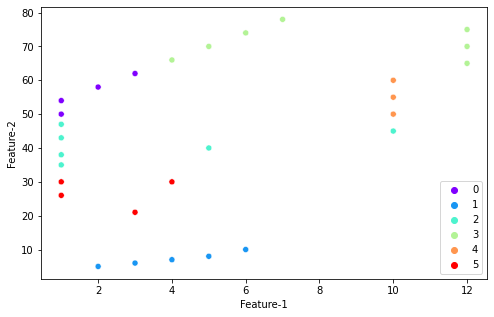

Silhouette Score:  0.45920262692165814
Calinski Harabasz: 109.36463908882185
Davies Bouldin: 0.6380802202771739


In [59]:
from sklearn.cluster import MiniBatchKMeans

#X_MBK = sample_df.copy()


MBK = MiniBatchKMeans(n_clusters=No_of_Clusters,init='k-means++',max_iter=5)
MBK.fit(sample_array)

cluster = MBK.labels_ 

fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette='rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(sample_array,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(sample_array,cluster))
print("Davies Bouldin:", davies_bouldin_score(sample_array,cluster))

In [69]:
pip install pyclustering

# 11. CURE

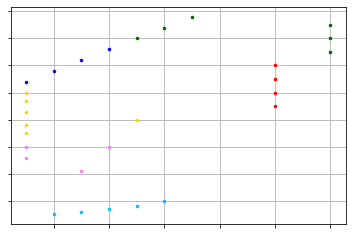

In [61]:
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer

# X_CURE = sample_df.copy()
# X_CURE_np = X_CURE.to_numpy()

# Allocate six clusters.
cure_instance = cure(sample_array, No_of_Clusters);
cure_instance.process();
cluster = cure_instance.get_clusters();

# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(cluster, sample_array);
visualizer.show();

# 12. CLARANS

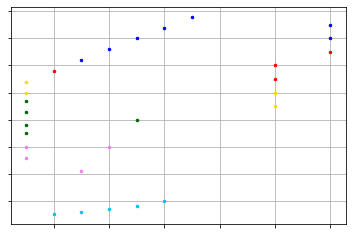

In [62]:
from pyclustering.cluster.clarans import clarans

# X_clarans = sample_df.copy()
# X_clarans_np = X_clarans.to_numpy()

# Allocate six clusters.
clarans = clarans(sample_array, No_of_Clusters, 6, 3);
clarans.process();
clusters = clarans.get_clusters();

# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, sample_array);
visualizer.show();

# 13. ROCK

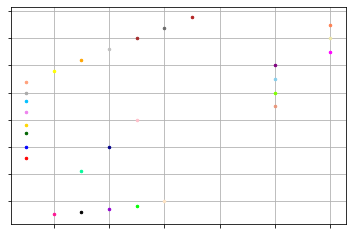

In [63]:
from pyclustering.cluster.rock import rock

# X_rock = sample_df.copy()
# X_rock_np = X_rock.to_numpy()

# Allocate six clusters.
rock = rock(sample_array, 1, No_of_Clusters, 0.5);
rock.process();
clusters = rock.get_clusters();

# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, sample_array);
visualizer.show();

# 14. HDBSCAN

In [64]:
conda install -c conda-forge hdbscan

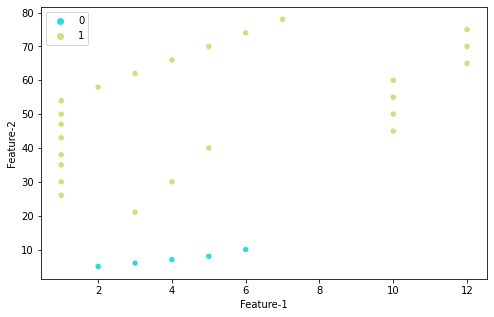

Silhouette Score:  0.5330290973607208
Calinski Harabasz: 32.949665570100336
Davies Bouldin: 0.3748512821106447


In [65]:
import hdbscan

# X_hdbscan = sample_df.copy()

hdb = hdbscan.HDBSCAN(algorithm = 'best', metric='euclidean',min_cluster_size=3, min_samples=3)
hdb.fit(sample_array)
cluster = hdb.labels_

fig = plt.figure(figsize=(8,5))
ax = sns.scatterplot(x=sample_array[:,0],y=sample_array[:,1],hue = cluster, palette = 'rainbow')
ax.set(xlabel= 'Feature-1',ylabel='Feature-2')
plt.show()

print("Silhouette Score: ", silhouette_score(sample_array,cluster))
print("Calinski Harabasz:", calinski_harabasz_score(sample_array,cluster))
print("Davies Bouldin:", davies_bouldin_score(sample_array,cluster))

<AxesSubplot:ylabel='distance'>

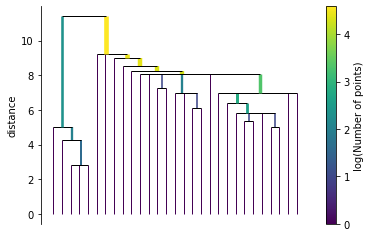

In [66]:
hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

# 15. K-Medoids

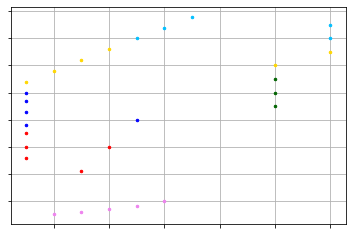

In [67]:
from pyclustering.cluster.kmedoids import kmedoids

# X_kmedoids = sample_df.copy()
# X_kmedoids_np = X_kmedoids.to_numpy()

# Allocate six clusters.
kmedoids = kmedoids(sample_array, [4 * multiplier for multiplier in range(No_of_Clusters)]);
kmedoids.process();
clusters = kmedoids.get_clusters();

# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, sample_array)
visualizer.show();